# PYTHON PARTE 2

## LAS SERIES Y LOS DATAFRAMES

Pandas: libreria de alto nivel que permite representar __series y tablas__ de datos y herramientas para el tratamiento de datos __sencillo__. 
- Desarrollo __2008__
- Construida sobre los fundamentos de NumPy: operaciones sobre arrays a nuevas estructuras
- UTIL: __datos heterogeneos representados de FORMA TABULAR__


- Una de las librerias __MAS UTILIZADAS__ en las primeras etapas del proceso de __ANALISIS DE DATOS__, esp. en __Aplicaciones Estadisticas__. 

### Importar librerias

In [116]:
# Trabajar con datos 
import numpy as np 
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
%matplotlib inline

### Estructuras de datos en PANDAS: Series y DataFrames

Son capaces de representar __series de datos__ y __datos en forma TABULAR__ (df).

#### SERIES

- Un __objeto__ tipo SERIES puede verse como un __objeto tipo array__ de __UNA DIMENSION__ que contiene __datos de un cierto tipo__ y tiene asociado __un indice__ (__este indice es un array de etiquetas__ cuyo __tamaño__ coincide con el del __array de datos__)

https://pandas.pydata.org/pandas-docs/stable/api.html#series


In [117]:
# Creamos un objeto tipo SERIE con pd.Series y una LISTA de elementos
serie = pd.Series([10, 20, 30, 40, -10])
serie

# de tipo int64 (columna derecha), indexados con array de enteros comenzando desde el 0

0    10
1    20
2    30
3    40
4   -10
dtype: int64

In [120]:
# PROPIEDADES DE LAS SERIES: objetos tipo INDEX y tipo VALUES (representan el indice y elementos de la serie)
print(serie.index)  # para en 5 sin coger ese numero, son 5 nums en total
print(serie.values)  # devuelve los valores de la serie

RangeIndex(start=0, stop=5, step=1)
[ 10  20  30  40 -10]


__VENTAJAS SERIES__: Permiten indexar cada elemento de la serie con un valor descriptivo o etiqueta.
1. Ejemplo: nuestros datos: TASA DE NATALIDAD DE DISTINTAS CIUDADES ESPAÑOLAS (ciudades españolas como etiquetas del indice) 
    - No etiquetas de tipo int64 (es decir, nums del 0 al 4)
    
- Las series poseen __mayor claridad a los datos que contienen y es mas facil acceder a los datos__ : ya que estos datos se podrian haber representado mediante un array.

In [121]:
nat = pd.Series([10.7,7.5,7.1,17.8,7.9],
               index = ['Murcia', 'Cantabria', 'Murcia', 'Melilla', 'Navarra'],
               name = 'Tasa de Natalidad')  # permite asignar NOMBRE a la serie creada
nat

Murcia       10.7
Cantabria     7.5
Murcia        7.1
Melilla      17.8
Navarra       7.9
Name: Tasa de Natalidad, dtype: float64

In [122]:
nat.name  # te devuelve el nombre que has asignado o que tiene

'Tasa de Natalidad'

##### acceder a los datos de una serie

1. Mediante la etiqueta __INDICE__ y __CORCHETES__ como en el caso de __listas o arrays__

In [123]:
nat['Murcia']

Murcia    10.7
Murcia     7.1
Name: Tasa de Natalidad, dtype: float64

2. Mediante la etiqueta __INDICE__ siempre que sea nombre valido en Python como si __fuera una propiedad de la serie__. 

In [125]:
nat.Murcia

Murcia    10.7
Murcia     7.1
Name: Tasa de Natalidad, dtype: float64

### Operaciones con SERIES
- Se mantienen muchas de las utilizadas con ARRAYS
    - Ej: las operaciones aritmeticas (+,-,*,/) que son vectorizadas, __manteniendose el valor del indice de la serie__

In [126]:
nat * 100  # multiplica los datos de la serie por 100 elemento a elemento

Murcia       1070.0
Cantabria     750.0
Murcia        710.0
Melilla      1780.0
Navarra       790.0
Name: Tasa de Natalidad, dtype: float64

In [127]:
# Las funciones "previamente definidas" en NumPy se pueden utilizar con Pandas sobre una SERIE O UN ARRAY
np.sqrt(nat)  # se calcula el cuadrado sobre cada elemento de las series

Murcia       3.271085
Cantabria    2.738613
Murcia       2.664583
Melilla      4.219005
Navarra      2.810694
Name: Tasa de Natalidad, dtype: float64

In [128]:
# Seleccion de elementos usando arrays de tipo booleano

nat < 10  # cuales son menores que y devuelve un booleano

Murcia       False
Cantabria     True
Murcia        True
Melilla      False
Navarra       True
Name: Tasa de Natalidad, dtype: bool

In [129]:
nat[nat < 10]  # de los datos de nat, indicar aquellos que sean menores que 

Cantabria    7.5
Murcia       7.1
Navarra      7.9
Name: Tasa de Natalidad, dtype: float64

__CARACTERISTICA ESTRELLA DE LAS SERIES__ :
- ALINEAMIENTO DE DATOS en base al valor de los __INDICES__ en las __OPERACIONES__ entre 2 series

In [131]:
# SERIE 1: creacion de serie 1: diferencia HOMBRES Y MUJERES
nach = pd.Series([2154, 8184, 10032, 780, 8177],
                index = ['Cantabria', 'Canarias', 'Galicia', 'Melilla', 'Murcia'],
                name = 'Nacidos Hombres')
nach

Cantabria     2154
Canarias      8184
Galicia      10032
Melilla        780
Murcia        8177
Name: Nacidos Hombres, dtype: int64

In [132]:
# SERIE 2: alusion a las mujeres
nacm = pd.Series([7962, 2221, 730, 9395],
                index = ['Canarias', 'Cantabria', 'Melilla', 'Galicia'],
                name = 'Nacidas Mujeres')
nacm

Canarias     7962
Cantabria    2221
Melilla       730
Galicia      9395
Name: Nacidas Mujeres, dtype: int64

In [133]:
nach + nacm  # Sumamos 2 series

# Murcia devuelve NaN: se usa para representar un campo VACIO o desconocido.
# sucede porque nach tiene una etiqueta para el valor murcia pero nacm no tiene dicha etiqueta : suma de ambos Nan

# cuando hay NaN es pq uno si tiene una etiqueta con valor y en la otra serie no existe esa etiqueta

Canarias     16146.0
Cantabria     4375.0
Galicia      19427.0
Melilla       1510.0
Murcia           NaN
dtype: float64

##### isnull y notnull

Estos metodos permiten a las series identificas las etiquetas en el INDICE ASOCIADAS a un valor NaN. 
- resultado: una nueva serie con valores Booleanos

In [134]:
nach.isnull()  # ver si hay elementos vacios

Cantabria    False
Canarias     False
Galicia      False
Melilla      False
Murcia       False
Name: Nacidos Hombres, dtype: bool

In [136]:
nacm.notnull()  # no hay nulos?

Canarias     True
Cantabria    True
Melilla      True
Galicia      True
Name: Nacidas Mujeres, dtype: bool

##### Analisis descriptivo: mean, median, std, min, max, quantile, describe

En el __analisis descriptivo__ de los datos representados mediante una __serie__ se puede realizar con los metodos __mean, median, std, min, max y quantile o usando metodo describe__ de la clase SERIE:

In [138]:
nach.mean(), nach.median(), nach.std()  # devuelve una tupla con la media, mediana y desviacion estandar 

(5865.4, 8177.0, 4114.478679006613)

In [139]:
nach.describe()  # describe todas las operaciones con los resultados de la serie

count        5.000000
mean      5865.400000
std       4114.478679
min        780.000000
25%       2154.000000
50%       8177.000000
75%       8184.000000
max      10032.000000
Name: Nacidos Hombres, dtype: float64

In [140]:
nacm.describe()

count       4.000000
mean     5077.000000
std      4243.484967
min       730.000000
25%      1848.250000
50%      5091.500000
75%      8320.250000
max      9395.000000
Name: Nacidas Mujeres, dtype: float64

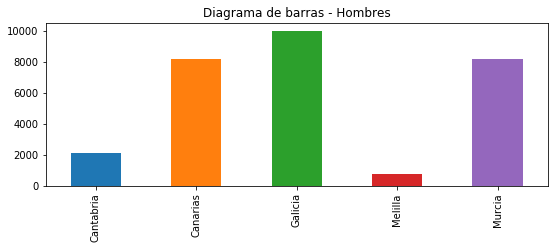

In [141]:
# creacion de graficos mas comunes en estadistica descriptiva: DIAGRAMA DE BARRAS
figura, ax1 = plt.subplots(1, figsize = (9,3))
nach.plot(ax=ax1, kind = 'bar', title = 'Diagrama de barras - Hombres');    

##### unique y value_counts: gestion de valores duplicados para SERIES
- unique devuelve un ARRAY con valores de la serie SIN DUPLICAR

In [145]:
pos = pd.Series(['Sur', 'Norte', 'Sur', 'Norte', 'Este'],
               index = ['Cádiz', 'Cantabria', 'Melilla', 'Galicia', 'Valencia'], 
               name = 'Ciudades Españolas')
pos

Cádiz          Sur
Cantabria    Norte
Melilla        Sur
Galicia      Norte
Valencia      Este
Name: Ciudades Españolas, dtype: object

In [147]:
pos.unique()  # vemos cuales son los valores unicos (si hay duplicados salen menos) y devuelve un array

array(['Sur', 'Norte', 'Este'], dtype=object)

In [148]:
pos.value_counts()  # devuelve la FRECUENCIA de cada uno de los valores de la SERIE

Sur      2
Norte    2
Este     1
Name: Ciudades Españolas, dtype: int64

### La clase DATAFRAME

Esta diseñada para __manejar datos representados en forma de TABLA__ donde las FILAS y las COLUMNAS estan indexadas.
- Objetos de tipo DF: son una __coleccion ordenada de columnas__ cada una ed las cuelaes viene representada por un objeto de tipo __SERIE__ con su nombre y su indice.

Hay varias formas de __CREAR OBJETOS__ dataframe dependiendo de la __PROCEDENCIA__ de los datos:
1. Usar la funcion __pd.DataFrame__ si datos estan representados MEDIANTE una __LISTA o un DICCIONARIO (de listas o arrays)__, una __SERIE__ o incluso otro __DF__. 
2. Si los fatos se encuentran en un __FICHERO__, pandas proporciona: 
    - pd.read_csv, pd.read_excel o pd.read_table : PARA CREAR UN __DF__

In [151]:
# Creacion de un DF a partir de un DICCIONARIO

d = {'Ciudades': ['Melilla', 'Canarias', 'Galicia', 'Cantabria', 'Murcia'],
    'Nacidos H': [780,8184, 10032, 2154, 8177]}  # diccionario de datos

# claves forman los INDICES DE LAS COLUMNAS
# valores: lista u objeto tipo ndarray de igual longitud

tabla = pd.DataFrame(data= d)
tabla

,Ciudades,Nacidos H
0,Melilla,780
1,Canarias,8184
2,Galicia,10032
3,Cantabria,2154
4,Murcia,8177


In [153]:
tabla.index  # atributos que representan los valores del indice

RangeIndex(start=0, stop=5, step=1)

In [154]:
tabla.values  # atributos que representan los valores del DF

array([['Melilla', 780],
       ['Canarias', 8184],
       ['Galicia', 10032],
       ['Cantabria', 2154],
       ['Murcia', 8177]], dtype=object)

> Los DataFrames tienen 2 indices (a diferencia de las Series que tienen 1)
- El primero es un indice comun asociado a todas las columnas y a cada una de las filas
- El segundo contiene un array de etiquetas o nombres de columnas 

In [155]:
tabla.columns  # representa el indice de las columnas

Index(['Ciudades', 'Nacidos H'], dtype='object')

In [197]:
# Mas argumentos para crear un DF, se puede hacer directamente 
    # Produccion de mantequilla en miles de toneladas
tabla3 = pd.DataFrame( data = [ ('Estonia', 8.4, 7.7, 6.7, 'A'), 
                                ('Ireland',193.5, 227.76, 221.05, 'B'),
                                ('Greece',1.4,1.6,1.5, 'A'),
                                ('Spain',50.52,58.9,46.72, 'C'),
                                ('France',415.09,423.1,400.52, 'A') ],
                       columns =  ['Desc', '2004', '2005', '2006', 'Tipo'], 
                       index = [ 'EE', 'IE', 'EL', 'ES', 'FR'])
tabla3

,Desc,2004,2005,2006,Tipo
EE,Estonia,8.40,7.70,6.70,A
IE,Ireland,193.50,227.76,221.05,B
EL,Greece,1.40,1.60,1.50,A
ES,Spain,50.52,58.90,46.72,C
FR,France,415.09,423.10,400.52,A


##### info
- Muestra info acerca del objeto DF (num de cols, num de filas, memoria usada..) e info relativa a cada una de las cols (nombre, tipo y numero de valores distintos de NaN)

In [198]:
tabla3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, EE to FR
Data columns (total 5 columns):
Desc    5 non-null object
2004    5 non-null float64
2005    5 non-null float64
2006    5 non-null float64
Tipo    5 non-null object
dtypes: float64(3), object(2)
memory usage: 240.0+ bytes


In [199]:
# Metodo describe disponible DF mostrando primeros estadisticos y permite hacer analisis en cada una de las cols num
tabla3.describe(include='all')  # devuelve todos los estadisticos.

# media, mediana, std dv, quantiles, min y max, frequencia, datos unicos...

,Desc,2004,2005,2006,Tipo
count,5,5.000000,5.000000,5.000000,5
unique,5,NaN,NaN,NaN,3
top,Greece,NaN,NaN,NaN,A
freq,1,NaN,NaN,NaN,3
mean,NaN,133.782000,143.812000,135.298000,NaN
std,NaN,175.270242,180.976401,173.191749,NaN
min,NaN,1.400000,1.600000,1.500000,NaN
25%,NaN,8.400000,7.700000,6.700000,NaN
50%,NaN,50.520000,58.900000,46.720000,NaN
75%,NaN,193.500000,227.760000,221.050000,NaN


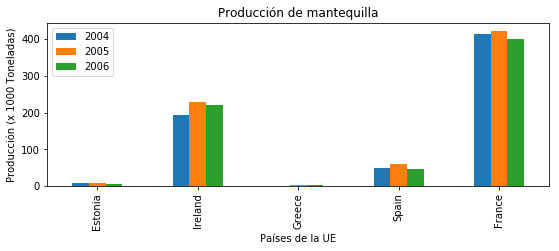

In [200]:
figura, ax1 = plt.subplots(1, figsize = (9,3))

tabla3.plot(ax=ax1, kind = 'bar', title = 'Producción de mantequilla')

ax1.set_xlabel('Países de la UE')
ax1.set_ylabel('Producción (x 1000 Toneladas)')

ax1.set_xticklabels(tabla3.Desc);

In [201]:
tabla3.min()  # sacamos valores unicos que necesitamos, el minimo que devuelve una SERIE

Desc    Estonia
2004        1.4
2005        1.6
2006        1.5
Tipo          A
dtype: object

In [202]:
tabla3.std()  # desviacion estandar del df

2004    175.270242
2005    180.976401
2006    173.191749
dtype: float64

Todas las operaciones estadisticas: admiten __axis__ para operar bien sobre los datos de las columnas o bien sobre los datos de las filas.

In [203]:
tabla3.sum(axis=1)  # suma de todas las filas

EE      22.80
IE     642.31
EL       4.50
ES     156.14
FR    1238.71
dtype: float64

Una operacion muy interesante cuando tratamos con __datos represnetados mediante DF__, es la de trasponer, CAMBIAR FILAS POR COLUMNAS O COLUMNAS POR FILAS. Para trasponer un DF es necesario utilizar el atributo T

In [204]:
tabla3.T  # trasponer un DF o cambiar los indices

,EE,IE,EL,ES,FR
Desc,Estonia,Ireland,Greece,Spain,France
2004,8.4,193.5,1.4,50.52,415.09
2005,7.7,227.76,1.6,58.9,423.1
2006,6.7,221.05,1.5,46.72,400.52
Tipo,A,B,A,C,A


## OPERACIONES CON SERIES Y DATAFRAMES

- una de las caracteristicas mas importantes de los indices de estructuras de datos en __PANDAS__ es el alineamiento. Es capaz de __alinear 2 estructuras (series o DATAFRAMES)__ en base a las etiquetas de sus indices. Es especialemnte interesanete cuando se realizan operaciones aritmenticas, ya que pueden involucrar estructuras con etiquetas comunes en sus indices, indices no ordenador, e incluso tener etietas en solo uno de sus indices. 
- mostraremos ejempplos de operaciones

In [205]:
import numpy as np 
import pandas as pd

In [206]:
# Creamos 2 dataframes con distintas etiquetas para sus indices

datos_1 = np.array([[1000,3000],
                   [5000, 1000],
                   [4200, 6000],
                   [5000, 5500]])

tabla_1 = pd.DataFrame(datos_1, columns = ('Gastos', 'Ingresos'),
                      index = [2006, 2002, 2005, 2007])
tabla_1

,Gastos,Ingresos
2006,1000,3000
2002,5000,1000
2005,4200,6000
2007,5000,5500


In [207]:
# DataFrame 2

datos_2 = np.array([[1000, 5000],
                   [5000, 5000],
                   [2500, 3000],
                   [2500, 1500]])
tabla_2 = pd.DataFrame(datos_2, columns = ('Gastos', 'Ingresos'),
                      index = [2002, 2006, 2007, 2008])
tabla_2

,Gastos,Ingresos
2002,1000,5000
2006,5000,5000
2007,2500,3000
2008,2500,1500


### Ordenacion de indices y valores

Ordenar los datos por __algun criterio__ es muy habitual cuando se trata de analizar los datos. El metodo __sort_index__ de la clase __DataFrame__ ordena lexicograficamente los indices de un df en base a cualquiera de sus indices. 

In [208]:
tabla_1

,Gastos,Ingresos
2006,1000,3000
2002,5000,1000
2005,4200,6000
2007,5000,5500


In [209]:
tabla_1.sort_index()  # ordena el indice de menor a mayor

,Gastos,Ingresos
2002,5000,1000
2005,4200,6000
2006,1000,3000
2007,5000,5500


In [210]:
tabla_1.sort_index(ascending=False)  # ordena el indice de mayor a menor

,Gastos,Ingresos
2007,5000,5500
2006,1000,3000
2005,4200,6000
2002,5000,1000


In [211]:
tabla_1.sort_index?  # para saber que hace el comando

SyntaxError: invalid syntax (<ipython-input-211-d71217034ffb>, line 1)

In [212]:
# Para ordenar el indice asociado a las COLUMNAS, utilizamos axis = 1

tabla_1.sort_index(axis=1, ascending=False)  # ha ordenado las columnas y ha cogido el conjunto de datos mas pequeño

,Ingresos,Gastos
2006,3000,1000
2002,1000,5000
2005,6000,4200
2007,5500,5000


Para __ordenar los valores__ de una serie o un df usamos el metodo __sort_values__ . 
- Cuando es un __DF__ es necesario __indicar las columnas (mediante una lista)__ por la que queremos ordenar en el argumento __by__.

In [213]:
tabla_1.sort_values(by = ['Gastos'])  # ordenamos el df por valores de la columna e indicamos en la lista 
    # el valor por el que queremos ordenar
    
# por defecto, ordenacion ascendente, si queremos hacerla descendente 
tabla_1.sort_values(by=['Gastos'], ascending= False)

,Gastos,Ingresos
2002,5000,1000
2007,5000,5500
2005,4200,6000
2006,1000,3000


In [214]:
tabla_1.sort_values(by=['Gastos', 'Ingresos'], ascending=[False, True])  
# queremos que una columna sea en orden descendente y otra en orden ascendente
# el argumento ascending es de tipo booleano

# fijese: en el de ingresos no esta del todo ascendente, ya que prima el orden del primero

,Gastos,Ingresos
2002,5000,1000
2007,5000,5500
2005,4200,6000
2006,1000,3000


### Tratamiento de los valores NaN

Cuando hay __valores vacios o valores desconocidos__ se identifican con Not A Number (NaN). 
- Pandas es capaz de tratar con estos valores de forma __implicita__ , hay que conocer todas las heramientas de manejo.

In [215]:
# Se puede asignar valores NaN de forma explicita usando np.nan de Numpy

serie3 = pd.Series([1, np.nan, 2], index=['A', 'B', 'C'])
serie3

A    1.0
B    NaN
C    2.0
dtype: float64

In [216]:
# Eliminar masivamente los NaN es con dropna en series --> Resultado: nueva estructura sin valores NaN

serie3.dropna()  # elimina de la serie el valor NaN

A    1.0
C    2.0
dtype: float64

In [217]:
# En df los Nan pueden estar en varias columnas 

tabla_3 = pd.DataFrame(data = [(np.nan, 'ES', 46449, np.nan),
                              ('Alemania', np.nan, np.nan, np.nan),
                              ('Japón', 'JP', np.nan, '2005')],
                      columns = ['País', 'Código', 'Pob.', 'Año'])
tabla_3

,País,Código,Pob.,Año
0,NaN,ES,46449.0,NaN
1,Alemania,NaN,NaN,NaN
2,Japón,JP,NaN,2005


In [218]:
# si hacemos un dropna en un df: 
tabla_3.dropna()  # nos quedamos sin datos pq cada columna tiene un Nan

,País,Código,Pob.,Año


__Solucion : eliminar filas con valores NaN de un DF__
- __axis = 0__
- __how = all__

In [219]:
tabla_3.dropna(how='all', axis= 0)

,País,Código,Pob.,Año
0,NaN,ES,46449.0,NaN
1,Alemania,NaN,NaN,NaN
2,Japón,JP,NaN,2005


Eliminar __filas o columnas__ que no alcanan un __num determinado de valores distinto de NaN__, usamos:
- __thresh__

Ejemplo: Eliminar aquellas filas __que no tienen al menos 3 valores distintos de Nan__, escribimos:
thresh = 2

In [220]:
tabla_3.dropna(thresh= 2, axis= 0)  # tener hasta 2 NaN como mucho

#thresh: Te dice que al menos tiene que haber ESA cantidad de valores distintos de NaN

,País,Código,Pob.,Año
0,NaN,ES,46449.0,NaN
2,Japón,JP,NaN,2005


In [221]:
tabla_3.fillna(0)  # no queremos eliminar Nan pero queremos sustituir NA por un valor por defecto

,País,Código,Pob.,Año
0,0,ES,46449.0,0
1,Alemania,0,0.0,0
2,Japón,JP,0.0,2005


Podemos indicar un valor por defecto para __CADA COLUMNA__
- Usar un diccionario como __argumento__ para fillna
    - Las claves son las etiquetas del indice de las __COLUMNAS AFECTADAS__ y el valor asociado a las claves el aquel que sustiruye por defecto a los NaN

In [222]:
d = {'País': 'ZZ', 
    'Código': '------',
    'Pob.': 0}
tabla_3.fillna(d)  # relleno de los valores NA en un df con valores que he dado a partir de un diccionario

,País,Código,Pob.,Año
0,ZZ,ES,46449.0,NaN
1,Alemania,------,0.0,NaN
2,Japón,JP,0.0,2005


En operaciones estadisticas, PANDAS ignora los valores NaN, pero __si no queremos ignorar los NA__, __utilizar skipna__

In [223]:
tabla_4 = pd.DataFrame(data = [ (8,7,6), 
                                   (19, np.nan, 221), 
                                   (1,1,np.nan)],
                           columns = ['2004', '2005','2006'],
                           index = ['EE', 'IE', 'EL'])

tabla_4

,2004,2005,2006
EE,8,7.0,6.0
IE,19,NaN,221.0
EL,1,1.0,NaN


In [224]:
tabla_4.mean()  # cuando se calcula la media, por defecto, se ifnoran los valores NaN

2004      9.333333
2005      4.000000
2006    113.500000
dtype: float64

In [225]:
# si no queremos ignorar los valores NaN al calcular la media skipna = False
tabla_4.mean(skipna=False)  # devuelve resultados con Nan

2004    9.333333
2005         NaN
2006         NaN
dtype: float64

### Relacion entre variables: correlacion y varianza

Operaciones estadisticas: __CORRELACION Y COVARIANZA__
- Representados en pandas: __corr y cov__ 
- Definidos tanto en Series como en Dataframes

> Cuando se calcula __correlacion entre un par de variables__ de un DF obtenemos una __MATRIZ DE CORRELACION__

In [226]:
datos_5 = [[40, 58, 119],
        [43, 59, 117],
        [41, 60, 120],
        [38, 61, 120],
        [36, 62, 126],
        [40, 63, 122]]  # definimos una lista de listas que vamos a convertir en un dataframe

tabla_5 = pd.DataFrame(datos_5, columns=['Edad', 'Peso', 'Altura'],
                      index = ['Persona 1', 'Persona 2', 'Persona 3', 'Persona 4', 'Persona 5', 'Persona 6'])
tabla_5

,Edad,Peso,Altura
Persona 1,40,58,119
Persona 2,43,59,117
Persona 3,41,60,120
Persona 4,38,61,120
Persona 5,36,62,126
Persona 6,40,63,122


In [227]:
matcorr_5 = tabla_5.corr()
matcorr_5

,Edad,Peso,Altura
Edad,1.000000,-0.529641,-0.849842
Peso,-0.529641,1.000000,0.729654
Altura,-0.849842,0.729654,1.000000


Text(0.5,1,'Matriz de Correlacion - Mapa de Calor')

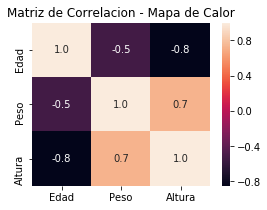

In [228]:
# Representar la matriz de correllacion mediante un mapa de calor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, figsize = (4,3))
sns.heatmap(matcorr_5, vmax=1, square =False, annot = True, fmt ='.1f')
ax.set_title('Matriz de Correlacion - Mapa de Calor')

In [229]:
matcov_5 = tabla_5.cov()
matcov_5  # calcular la covarianza del DF

,Edad,Peso,Altura
Edad,5.866667,-2.4,-6.333333
Peso,-2.400000,3.5,4.200000
Altura,-6.333333,4.2,9.466667


Text(0,0.5,'Peso')

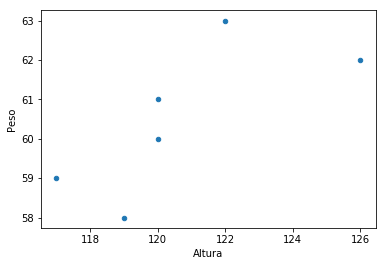

In [230]:
# Representacion de la covarianza
tabla_5.plot(kind='scatter', x='Altura', y='Peso');
plt.xlabel('Altura')
plt.ylabel('Peso')

In [231]:
# Calcular la correlacion ENTRE 2 SERIES o un PAR DE COLUMNAS
CorrSeries = tabla_5['Edad'].corr(tabla_5['Altura'])
CorrSeries

-0.8498418170203593

## Acceso y actualizacion de los datos

Acceder a los __datos__ contenidos en una __SERIE o un DATAFRAME__ y para realizar su actualizacion.

In [232]:
# Trabajar con datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
%matplotlib inline

### Acceso a los datos

__Acceder a las columas__ : '.' o notación de [nombre de la columna]  --> RESULTADO: TIPO SERIE

In [233]:
tabla3

,Desc,2004,2005,2006,Tipo
EE,Estonia,8.40,7.70,6.70,A
IE,Ireland,193.50,227.76,221.05,B
EL,Greece,1.40,1.60,1.50,A
ES,Spain,50.52,58.90,46.72,C
FR,France,415.09,423.10,400.52,A


In [234]:
tabla3.Desc  # Devuelve de un DF una columna con los elementos que hay dentro en forma de SERIE

EE    Estonia
IE    Ireland
EL     Greece
ES      Spain
FR     France
Name: Desc, dtype: object

##### Seleccion por ETIQUETA -loc  - NOMBRES-

Permite __recuperar PARTES del DF__ indicando el nombre de las __FILAS y COLUMNAS__ que queremos seleccionar (indicando las etiquetas de cada uno de los indices)

In [235]:
# Recuperar los datos de paises IE y ES

tabla3.loc['IE':'ES']  # coger datos desde x a Y a partir de los datos de FILAS

,Desc,2004,2005,2006,Tipo
IE,Ireland,193.50,227.76,221.05,B
EL,Greece,1.40,1.60,1.50,A
ES,Spain,50.52,58.90,46.72,C


In [236]:
# Recuperar los datos de columnas segun datos de fila : 2004 y 2005 de los paises correspondientes a filas IE y ES

result = tabla3.loc['IE': 'ES', ['2004', '2005']]  # IMPORTANTE
result

,2004,2005
IE,193.50,227.76
EL,1.40,1.60
ES,50.52,58.90


In [237]:
# Seleccionar una columna de datos de 2 filas 
result = tabla3.loc[['IE', 'ES'], ['2004']]
result  # Queremos la produccion de 2 paises en años 2004 y 2006

,2004
IE,193.50
ES,50.52


In [238]:
tabla3.loc['IE', '2006']  # seleccionar UN VALOR ESCALAR (que no devuelva un df sino un valor)  

# esto corresponde a la produccion de mantequilla en 2006 en IE

221.05

##### Seleccion por POSICION -iloc  - NUMERO -

Recuperara __PARTES__ del DF indexando filas y columnas con VALORES de tipo __INT__ comenzando desde el __0__.

In [239]:
# Recuperar la primera fila del DF: devuelve los valores de las columnas con los datos de la primera fila
tabla3.iloc[0]

# Resultado: SERIE que coincide con valor de FILA SELECCIONADA

Desc    Estonia
2004        8.4
2005        7.7
2006        6.7
Tipo          A
Name: EE, dtype: object

In [240]:
# Recuperar las 3 primeras filas por una parte y la 1 y ultima columa: recuperar numero de filas y numero de columnas
tabla3.iloc[:3,[0,-1]] 

,Desc,Tipo
EE,Estonia,A
IE,Ireland,B
EL,Greece,A


In [241]:
tabla3.head(3)  # devuelve las 3 primeras filas del df para observar, se utilia cuando los datos son muy largos

,Desc,2004,2005,2006,Tipo
EE,Estonia,8.4,7.70,6.70,A
IE,Ireland,193.5,227.76,221.05,B
EL,Greece,1.4,1.60,1.50,A


In [242]:
tabla3.tail(100)  # devuelve los 100 ultimos valores

,Desc,2004,2005,2006,Tipo
EE,Estonia,8.40,7.70,6.70,A
IE,Ireland,193.50,227.76,221.05,B
EL,Greece,1.40,1.60,1.50,A
ES,Spain,50.52,58.90,46.72,C
FR,France,415.09,423.10,400.52,A


In [243]:
# Seleccionar partes de un DF mediante el uso de filtros o como se aplicaba con los arrays de NUMPY

tabla2= pd.DataFrame([10.7, 7.5, 7.1, 17.8, 7.9],
                    columns = ['Valor'],
                    index = ['Murcia', 'Cantabria', 'Galicia', 'Melilla', 'Canarias'])
tabla2

,Valor
Murcia,10.7
Cantabria,7.5
Galicia,7.1
Melilla,17.8
Canarias,7.9


In [244]:
tabla2.Valor < 10  # De la columna VALOR queremos los datos que cumplan la condicion de ser menores que 10

Murcia       False
Cantabria     True
Galicia       True
Melilla      False
Canarias      True
Name: Valor, dtype: bool

In [245]:
tabla2[tabla2.Valor < 10]  # Aplicamos un filtro con condicion para que enseñe determinados valores

,Valor
Cantabria,7.5
Galicia,7.1
Canarias,7.9


### Actualización de datos de un DF

A veces, los datos que analizamos __no contienen toda la informacion necesaria__ o no estan dentro del __formato__ adecuado.
- SOLUCION: __modificar los valores del df__, borrar columnas, crear columnas con nuevos valores o incluso columnas cuyos valores se calcular a partir de valores de otras columnas.

##### Modificando valores de un DF

In [246]:
# A partir de un valor concreto o un ARRAY de valores

tabla3.Tipo = 'D' # creamos una columna nueva llamada Tipo con valores equivalentes a D

In [247]:
tabla3['nueva'] = 'P' # creamos una columna nueva llamada nueva con valores equivalentes a P

In [248]:
tabla3

,Desc,2004,2005,2006,Tipo,nueva
EE,Estonia,8.40,7.70,6.70,D,P
IE,Ireland,193.50,227.76,221.05,D,P
EL,Greece,1.40,1.60,1.50,D,P
ES,Spain,50.52,58.90,46.72,D,P
FR,France,415.09,423.10,400.52,D,P


In [249]:
tabla3.Tipo = ['D', 'D', 'D', 'E', 'F']  # cambiamos los valores que hay dentro del df a partir de una columna
tabla3

,Desc,2004,2005,2006,Tipo,nueva
EE,Estonia,8.40,7.70,6.70,D,P
IE,Ireland,193.50,227.76,221.05,D,P
EL,Greece,1.40,1.60,1.50,D,P
ES,Spain,50.52,58.90,46.72,E,P
FR,France,415.09,423.10,400.52,F,P


##### map

Modificar el __valor de una columna__ aplicando una __FUNCION DE TRANSFORMACION__. 

In [250]:
# Transformar los valores de la columna Desc a MAYUSCULAS
tabla3.Desc = tabla3.Desc.map(str.upper)  # Poner todos los valores en MAYUSCULAS con MAP
tabla3

,Desc,2004,2005,2006,Tipo,nueva
EE,ESTONIA,8.40,7.70,6.70,D,P
IE,IRELAND,193.50,227.76,221.05,D,P
EL,GREECE,1.40,1.60,1.50,D,P
ES,SPAIN,50.52,58.90,46.72,E,P
FR,FRANCE,415.09,423.10,400.52,F,P


##### applymap

La funcion __map__ aplica la funcion __lambda__ a CADA UNO DE LOS VALORES DE LA COLUMNA. 

Si queremos modificar todos los datos de tipo (`numerico`) del DF de forma que __TENGAN UN UNICO DECIMAL__, usamos applymap junto con lambda:

In [251]:
tabla3 = tabla3.applymap(lambda x : round(x,1) if type(x) == float else x)  # poner un decimal en el DATAFRAME
tabla3

,Desc,2004,2005,2006,Tipo,nueva
EE,ESTONIA,8.4,7.7,6.7,D,P
IE,IRELAND,193.5,227.8,221.1,D,P
EL,GREECE,1.4,1.6,1.5,D,P
ES,SPAIN,50.5,58.9,46.7,E,P
FR,FRANCE,415.1,423.1,400.5,F,P


### Eliminar columnas en un DF

##### pop, drop

1. METODO __pop__ de clase DF : ELIMINA __UNA COLUMNA ESPECIFICADA__ y devuelve la columna con un __OBJETO DE TIPO SERIE__.
> Este metodo modifica el DF 

2. METODO __drop__ : BORRA TANTO __FILAS COMO COLUMNAS__ PEROOOOO devuelve una copia del df.
> Este metodo NO modifica el DF

In [252]:
# Eliminar la columna Tipo y devuelve una SERIE, luego miramos la tabla 3
columna_tipo = tabla3.pop('Tipo')
columna_tipo

EE    D
IE    D
EL    D
ES    E
FR    F
Name: Tipo, dtype: object

In [253]:
tabla3  # ya no esta la columna tipo en el df

,Desc,2004,2005,2006,nueva
EE,ESTONIA,8.4,7.7,6.7,P
IE,IRELAND,193.5,227.8,221.1,P
EL,GREECE,1.4,1.6,1.5,P
ES,SPAIN,50.5,58.9,46.7,P
FR,FRANCE,415.1,423.1,400.5,P


In [254]:
type(columna_tipo)

pandas.core.series.Series

In [255]:
# Con drop: eliminamos tanto filas como columnas: UTILIZAR EL METODO AXIS
    # lo guardamos en un nuevo DF que es una copia
nuevo_df = tabla3.drop(['IE', 'FR'])  # estamos eliminando 2 filas
nuevo_df 

,Desc,2004,2005,2006,nueva
EE,ESTONIA,8.4,7.7,6.7,P
EL,GREECE,1.4,1.6,1.5,P
ES,SPAIN,50.5,58.9,46.7,P


In [257]:
tabla3.drop('Desc', axis=1, inplace=True)
tabla3  # hemos eliminado de las columnas una entera

,2004,2005,2006,nueva
EE,8.4,7.7,6.7,P
IE,193.5,227.8,221.1,P
EL,1.4,1.6,1.5,P
ES,50.5,58.9,46.7,P
FR,415.1,423.1,400.5,P


### Insertar datos en un DF

Para añadir __NUEVAS COLUMNAS al DF__ (calculadas o no) podemos usar la notacion de los [nombre de la nueva columna].

In [258]:
tabla3['Unidad'] = '1000 T'
tabla3

,2004,2005,2006,nueva,Unidad
EE,8.4,7.7,6.7,P,1000 T
IE,193.5,227.8,221.1,P,1000 T
EL,1.4,1.6,1.5,P,1000 T
ES,50.5,58.9,46.7,P,1000 T
FR,415.1,423.1,400.5,P,1000 T


Para crear una __COLUMNA NUEVA CALCULADA A PARTIR DE OTRAS COLUMNAS DEL DF__

In [259]:
# Crear la columna de totales

In [260]:
tabla3['Total'] = tabla3['2004'] + tabla3['2005'] + tabla3['2006']
tabla3

,2004,2005,2006,nueva,Unidad,Total
EE,8.4,7.7,6.7,P,1000 T,22.8
IE,193.5,227.8,221.1,P,1000 T,642.4
EL,1.4,1.6,1.5,P,1000 T,4.5
ES,50.5,58.9,46.7,P,1000 T,156.1
FR,415.1,423.1,400.5,P,1000 T,1238.7


Otra forma de __AÑADIR INFORMACION AL DF__ es mediante __INSERT__ 
- Para insertar __UNA COLUMNA__ que __HEMOS ELIMINADO ANTERIORMENTE CON UNA POSICION__ escribimos:

In [261]:
# Insertar una nueva columna en la segunda posicion

tabla3.insert(2, 'Tipo', columna_tipo)
tabla3  # insertar una nueva columna en la posicion 2 que se llame Tipo con los datos de columna_tipo

,2004,2005,Tipo,2006,nueva,Unidad,Total
EE,8.4,7.7,D,6.7,P,1000 T,22.8
IE,193.5,227.8,D,221.1,P,1000 T,642.4
EL,1.4,1.6,D,1.5,P,1000 T,4.5
ES,50.5,58.9,E,46.7,P,1000 T,156.1
FR,415.1,423.1,F,400.5,P,1000 T,1238.7


## Preparacion y Limpieza de los Datos

La mayor parte en analisis de datos se invierte en la preparacion de datos. 
- Se necesita un __determinado formato__ y a veces no cumplen nuestros __requisitos__
- Es necesario proceder a la limpieza, transformacion, procesamiento...

In [51]:
# Importacion de librerias en limpieza de datos

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline  # esto implica que las graficas estaran incluidas en nuestro notebook seguido del codigo

### Eliminacion de duplicados :
- __Cuidado : 'Grandes Cantidades de datos'__
- Método duplicated de la clase DataFrame: permite identificar FILAS repetidas
    - Resultado: __Serie con resultados de tipo BOOLEANOS: cada uno asociado a una FILA__
    
- __True__: YA EXISTE una fila anterior en el DF con los mismo valores (la primera aparicion no se considera repetida)
- __False__: NO EXISTE una fila anterior con valores repetidos.

In [52]:
t = pd.DataFrame([['Africa', 11506], 
                 ['Africa', 11506], 
                 ['Antartica', 5500],
                 ['Antartica', 5500],
                 ['Africa', 11506],
                 ['Banks', 23],
                 ['Africa', 10000]], columns = ['Nombre', 'Millas Cuadradas'])
t

,Nombre,Millas Cuadradas
0,Africa,11506
1,Africa,11506
2,Antartica,5500
3,Antartica,5500
4,Africa,11506
5,Banks,23
6,Africa,10000


In [53]:
t.duplicated()  # Aquellos que devuelven True indican que el valor ya sale ANTES

# se utiliza como filtro para obtener un DF con las filas repetidas

0    False
1     True
2    False
3     True
4     True
5    False
6    False
dtype: bool

In [54]:
t[t.duplicated()]  # devuelve los valores DUPLICADOS

,Nombre,Millas Cuadradas
1,Africa,11506
3,Antartica,5500
4,Africa,11506


In [55]:
# Para eliminar las filas repetidas de un df utilizamos el metodo: drop_duplicates de la clase DF
t.drop_duplicates()

,Nombre,Millas Cuadradas
0,Africa,11506
2,Antartica,5500
5,Banks,23
6,Africa,10000


In [56]:
# Nos puede interesar eliminar filas si se repiten los valores de un subconjunto de columnas 
    # indicar dicho subconjunto de columnas con el argumento subset
t.drop_duplicates(subset=['Nombre'])  # elimina las filas en los que en la columna NOMBRE se repitan los valores

,Nombre,Millas Cuadradas
0,Africa,11506
2,Antartica,5500
5,Banks,23


Se mantiene por defecto primero la __primera FILA__ y se elimina el resto de __FILAS REPETIDAS__. Con el argumento __keep__ con valor __last__ se eliminan todas las filas REPETIDAS excepto la __ULTIMA APARICION__

In [57]:
t.drop_duplicates(subset=['Nombre'], keep= 'last')  # Si queremos dejar el ultimo duplicado de la fila en vez del primero

,Nombre,Millas Cuadradas
3,Antartica,5500
5,Banks,23
6,Africa,10000


### Aplicacion de funciones

#### Funciones elemento a elemento

- Pandas esta construida SOBRE NumPy por tanto las funciones de esta ultima se extienden y se adaptan a Pandas.
- Funciones que se aplican a cad uno de los valores de la estructura
    - Ya sea: __Series, DF o ndarray__

In [60]:
datos = [(8, 7, 6),
        (2,4,16), 
        (10,20,30),
        (4,2,5)]
tablad = pd.DataFrame(datos, columns= ['2004', '2005', '2006'],
                     index = ['Estonia', 'Ireland', 'Greece', 'Spain'])
tablad

,2004,2005,2006
Estonia,8,7,6
Ireland,2,4,16
Greece,10,20,30
Spain,4,2,5


In [61]:
# Calcular el CUADRADO de cada uno de los valores del DF : np.square de Numpy
np.square(tablad)

,2004,2005,2006
Estonia,64,49,36
Ireland,4,16,256
Greece,100,400,900
Spain,16,4,25


Tambien se pueden aplicar FUNCIONES que definamos como usuarios
- En el caso de tipo 'Series' es necesario utilizar el método __map__ para APLICAR FUNCIONES DE USUARIO


In [62]:
seriemia = pd.Series([2,4,6,8], index = ['EE', 'IR', 'GR', 'ES'])
seriemia

EE    2
IR    4
GR    6
ES    8
dtype: int64

In [63]:
funcion_1 = lambda x: x**2 - 2

In [65]:
seriemia.map(funcion_1)  # aplicamos una funcion definida en lambda a una SERIE con MAP

EE     2
IR    14
GR    34
ES    62
dtype: int64

In [67]:
tablad.applymap(funcion_1)
# aplicamos una funcion definida lambda a un DF con APPLYMAP

,2004,2005,2006
Estonia,62,47,34
Ireland,2,14,254
Greece,98,398,898
Spain,14,2,23


In [69]:
# Creamos otra funcion que multiplique por 10 con una condicion : valores menores que 100

funcion_2 = lambda x: x * 10 if x < 10 else x

In [70]:
# Funciones para CREAR nuevas COLUMNAS en un DF con DATOS de otra COLUMNA
    # Columna nueva con funcion

tablad['Nueva'] = tablad['2004'].map(funcion_2)  # al ser una serie le aplicamos una funcion nueva
tablad

,2004,2005,2006,Nueva
Estonia,8,7,6,80
Ireland,2,4,16,20
Greece,10,20,30,10
Spain,4,2,5,40


> __applymap__: se aplica a cada elemento de un __DATAFRAME__
> __map__: se aplica a cada elemento de una __SERIE__

### Funciones aplicables a lineas o columnas

Con el metodo __apply__ de la clase __DF__ se aplican funciones creadas por nosotros tanto a __FILAS__ como a __COLUMNAS__ de un df

In [71]:
funcion_3 = lambda x: x.sum() - x.min()

In [72]:
t = pd.DataFrame([[10, 20, 30],
                 [40, 10, 60],
                 [70, 80, 10]],
                index = ['P1', 'P2', 'P3'],
                columns = ['A', 'B', 'C'])
t

,A,B,C
P1,10,20,30
P2,40,10,60
P3,70,80,10


In [74]:
t.apply(funcion_3)  # aplicamos la funcion creada a nuestro df y 
# se aplica a cada columna: devuelve valores de las columnas con la funcion aplicada

# Resultado: SERIE : etiquetas indices de columnas del DF

A    110
B    100
C     90
dtype: int64

In [76]:
# Ahora con axis para aplicar la funcion del df a las filas

t.apply(funcion_3, axis=1)  # aplicamos la funcion a filas

P1     50
P2    100
P3    150
dtype: int64

### Grupos y operaciones de agregacion

__Despues de importar datos y procesarlos__, una de las tareas mas habituales el la agrupacion de datos __por alguna caracteristica__ oara realizar operaciones sobre cada uno de los grupos obtenidos. 
- Se realiza en un unico paso: __GROUPBY__ de DF : similar a group by en SQL

#### La operacion GROUP BY
1. Los datos se dividen en grupos basados en caracteristicas
    - Ej: es posible hacer __grupos por filas__ (axis = 0) o __por columnas__ (axis = 1)
2. Tras crear los grupos se puede realizar __alguna operacion__ 
    - Ej: operaciones __De agregacion__ u
    - operaciones de __transformacion__ (a cada uno de los grupos y se __obtiene una SERIE para cada grupo__
3. Se aplica la funcion (o predefinida en el paquete o creada por el usuario) a __cada uno de los grupos__
4. Resultado: __VALOR__ para __cada uno de los grupos__ 


In [ ]:
import numpy as np
import pandas as pd

In [77]:
datos =[['Chile', 'South America', 'Dutch', 35],
        ['Burundi', 'Africa', 'French',2],
        ['China', 'Asia', 'Dutch', 62],
        ['Cuba', 'North America', 'Dutch', 40],
        ['Andorra', 'Europe', 'French', 6],
        ['China', 'Asia', 'Greek', 2],
        ['Burundi', 'Africa', 'French', 1],
        ['Belgium', 'Europe', 'Dutch', 50],
        ['Belgium', 'Europe', 'French', 32],
        ['Cuba', 'North America', 'Greek', 3]]

In [78]:
t = pd.DataFrame(datos, columns=['País', 'Continente', 'Idioma', 'Poblacion %'])  # el n de col depende de los datos en cada lista
t

,País,Continente,Idioma,Poblacion %
0,Chile,South America,Dutch,35
1,Burundi,Africa,French,2
2,China,Asia,Dutch,62
3,Cuba,North America,Dutch,40
4,Andorra,Europe,French,6
5,China,Asia,Greek,2
6,Burundi,Africa,French,1
7,Belgium,Europe,Dutch,50
8,Belgium,Europe,French,32
9,Cuba,North America,Greek,3


Queremos conocer el __NUMERO__ de idiomas que se habla en cada pais
- 1. se hacen grupos como paises y se cuentan el numero de tuplas de cada grupo
    - con groupby columna 'País'

In [79]:
g = t.groupby(['País'])
g  # es un OBJETO de tipo group by que tienen una serie de propiedades

In [80]:
g.groups  # propiedades de los objetos groupby

{'Andorra': Int64Index([4], dtype='int64'),
 'Belgium': Int64Index([7, 8], dtype='int64'),
 'Burundi': Int64Index([1, 6], dtype='int64'),
 'Chile': Int64Index([0], dtype='int64'),
 'China': Int64Index([2, 5], dtype='int64'),
 'Cuba': Int64Index([3, 9], dtype='int64')}

In [81]:
g.ngroups  # india el numero de grupos en los que se ha dividido el dataframe ORIGINAL

# aunque contamos lo de arriba y tambien lo sabemos

6

El método __size__ : de la clase GroupBy devuelve como resultado __UNA SERIE__ 
- El __indice__ esta formado por los nombres de cada grupo y los valores asociados que se corresponden con el tamaño del grupo

In [82]:
g.size()  # sobre el dataframe agrupado

# Belgica tiene 2 valores mientras que Andorra tiene solo un valor 

País
Andorra    1
Belgium    2
Burundi    2
Chile      1
China      2
Cuba       2
dtype: int64

In [83]:
# Mostramos el DF para seguir operando
t  # lo mas normal: groupby y luego una operacion de agregacion 

,País,Continente,Idioma,Poblacion %
0,Chile,South America,Dutch,35
1,Burundi,Africa,French,2
2,China,Asia,Dutch,62
3,Cuba,North America,Dutch,40
4,Andorra,Europe,French,6
5,China,Asia,Greek,2
6,Burundi,Africa,French,1
7,Belgium,Europe,Dutch,50
8,Belgium,Europe,French,32
9,Cuba,North America,Greek,3


In [84]:
# Ahora hacemos otro groupby
t.groupby(['País']).Idioma.count()  # Es decir de cada pais, contar los idiomas que se asocian

# En Andorra se habla 1, en Belgica se hablan 2

País
Andorra    1
Belgium    2
Burundi    2
Chile      1
China      2
Cuba       2
Name: Idioma, dtype: int64

In [85]:
# Agrupar los datos por idioma y aplicar la funcion de agregacion count() = numero de paises
t.groupby(['Idioma']).País.count()  # Numero de paises asociados a cada idioma

Idioma
Dutch     4
French    4
Greek     2
Name: País, dtype: int64

El resultado: 
- __SERIE__ donde las etiquetas del indice son valores del __campo agrupacion__
- Tenemos un fichero __csv__ con informacion de una coleccion de envios
    - Conocemos la FECHA DE ENTREGA de cada uno, la categoria, el importe, el peso del paquete y un indicador de si es urgente o no.

In [89]:
import os
print (os.getcwd())  # obtenemos el directorio de trabajo

# como ya esta en el directorio solo pongo un salto y el nombre del CSV

/Users/martadivasson/Desktop/EXAMENES


In [91]:
fact = pd.read_csv("./envios.csv", index_col=[0], parse_dates=[0])
fact

,Categoria,Importe,Peso,Urgente
2006-06-20,P,0.90,0.99,Si
2006-10-17,P,4.40,0.20,Si
2006-06-23,M,0.10,2.70,Si
2006-06-24,M,2.70,1.50,Si
2006-06-27,M,2.80,0.34,Si
2006-06-25,G,0.70,1.32,Si
2006-06-21,P,0.40,0.21,No
2006-12-14,P,0.80,0.12,No
2006-06-22,G,4.20,0.40,No
2006-10-29,G,4.99,0.34,No


1. conocer la media del Importe para __CADA CATEGORIA__
    - __agrupar__ por la columna categoria
    - __seleccionar por la columna__ importe 
    -  Aplicar el __metodo mean__ que calcula la media

In [92]:
fact.groupby(['Categoria']).mean()  # la media para cada elemento de categoria

,Importe,Peso
Categoria,,
G,3.220000,0.790000
M,1.866667,1.513333
P,1.625000,0.380000


In [95]:
# Calcular ahora la MEDIA del IMPORTE para CADA CATEGORIA
fact.groupby(['Categoria', 'Urgente']).Importe.mean()  # agrupamos por los valores de la col urgente

Categoria  Urgente
G          No         4.060000
           Si         0.700000
M          Si         1.866667
P          No         0.600000
           Si         2.650000
Name: Importe, dtype: float64

Resultado: Una serie con indice __jerarquico__ 
- con la funcion __unstack__ : obtenemos el resultado de un dataframe con indie jerarquico para el indice de las columnas

In [97]:
fact.groupby(['Categoria', 'Urgente']).Importe.mean().unstack()  # obtenemos lo de arriba pero con indices de columnas

Urgente,No,Si
Categoria,,
G,4.06,0.700000
M,NaN,1.866667
P,0.60,2.650000


#### Agrupando con funciones
- Es posible aplicar una __funcion__ a cada uno de los valores del INDICE y agrupar los datos en vase al __valor devuelto por una funcion__

In [98]:
fact

,Categoria,Importe,Peso,Urgente
2006-06-20,P,0.90,0.99,Si
2006-10-17,P,4.40,0.20,Si
2006-06-23,M,0.10,2.70,Si
2006-06-24,M,2.70,1.50,Si
2006-06-27,M,2.80,0.34,Si
2006-06-25,G,0.70,1.32,Si
2006-06-21,P,0.40,0.21,No
2006-12-14,P,0.80,0.12,No
2006-06-22,G,4.20,0.40,No
2006-10-29,G,4.99,0.34,No


In [99]:
# Conocer el importe TOTAL facturado en CADA DIA de la semana (importe el lunes, importe el martes..)
    # Usar la funcion calcular_dia: obtener el dia de la semana (valor num entre 0 y 6)

In [100]:
from datetime import date  # libreria date para trabajar con fechas

In [101]:
def calcular_dia(f):
    return f.weekday()

In [102]:
calcular_dia(date(2006,6,26))  # este es el valor de una fecha del indice 
# corresponde al lunes

0

In [104]:
# A groupby le aplicamos una funcion

r = fact.groupby(calcular_dia)
r.ngroups  # tipo groupby de tamaño 7

7

In [105]:
for(dia, contenido) in r:
    print(dia)
    print(contenido)

0
           Categoria  Importe  Peso Urgente
2006-06-26         G     2.99   1.1      No
1
           Categoria  Importe  Peso Urgente
2006-06-20         P      0.9  0.99      Si
2006-10-17         P      4.4  0.20      Si
2006-06-27         M      2.8  0.34      Si
2
           Categoria  Importe  Peso Urgente
2006-06-21         P      0.4  0.21      No
3
           Categoria  Importe  Peso Urgente
2006-12-14         P      0.8  0.12      No
2006-06-22         G      4.2  0.40      No
4
           Categoria  Importe  Peso Urgente
2006-06-23         M      0.1   2.7      Si
5
           Categoria  Importe  Peso Urgente
2006-06-24         M      2.7   1.5      Si
6
           Categoria  Importe  Peso Urgente
2006-06-25         G     0.70  1.32      Si
2006-10-29         G     4.99  0.34      No


In [106]:
fact.groupby(calcular_dia).Importe.sum()  # importe TOTAL de CADA GRUPO
# con la funcion de agregacion sum a la col

0    2.99
1    8.10
2    0.40
3    5.00
4    0.10
5    2.70
6    5.69
Name: Importe, dtype: float64

#### Agrupando por indice

A veces queremos agrupar por otros valores que no sean los de las columnas. El argumento axis del metodo groupby permite indicar si una agruoacion de seralizzar por __ETIQUETAS EN EL INDICE (axis = 0),__ por los valores del __COLUMNAS (axis = 1)__.
- Con el argumento __level__ indicamos el nivel del indice por el que se quiere agrupar

In [108]:
datos = {'Producto': ['p1', 'p2', 'p3', 'p3', 'p2', 'p4', 'p2'],
         'Cantidad': [2.0, 3.0, 4.0, 1.0, 2.0, 5.0, 1.0], 
         'Precio' : [1.0, 3.0, 2.0, 1.0, 4.0, 2.0, 3.0]}
pedidos = pd.DataFrame(datos, 
                      columns = ['Producto', 'Cantidad', 'Precio'],
                      index = ['101', '101', '102', '102', '103', '103', '103'])
pedidos

# el codigo de pedido corresponde a las etiquetas del indice de las filas
    # calcular el precio medio de cada pedido

,Producto,Cantidad,Precio
101,p1,2.0,1.0
101,p2,3.0,3.0
102,p3,4.0,2.0
102,p3,1.0,1.0
103,p2,2.0,4.0
103,p4,5.0,2.0
103,p2,1.0,3.0


In [110]:
pedidos.groupby(axis = 0, level = 0).Precio.mean()  # agrupamos a nivel de indice de FILAS e indicamos el nivel 
# posteriormente aplicamos la media con mean a la COLUMNA precio

101    2.0
102    1.5
103    3.0
Name: Precio, dtype: float64

### Funciones de agregacion

Una vez que tenemos los datos divididos en grupos, llevamos a cabo __operaciones de agregacion__ (mean, sum, count...)
- Permiten operar con un resultado que de un __unico valor por grupo__ 
- Podemos definir funciones de usuario e utilizarlas tambien con __agg__

In [111]:
# Ej: Calcular el precio total de cada pedido - precio del producto mas barato

In [112]:
pedidos

,Producto,Cantidad,Precio
101,p1,2.0,1.0
101,p2,3.0,3.0
102,p3,4.0,2.0
102,p3,1.0,1.0
103,p2,2.0,4.0
103,p4,5.0,2.0
103,p2,1.0,3.0


In [113]:
# Definimos la funcion que calcula
def total_desc(datos):  # esto se hace sobre los datos antes de convertirlo a un df
    minimo = datos.min()
    total = datos.sum()- minimo
    return total

# LA FUNCION RECIBE COMO ARGUMENTO UNA SERIE 

In [114]:
# aplicamos la dfuncion como ARGUMENTO de agg a la col PRECIO de cada uno de los grupos

totales_descuento = pedidos.groupby(level = 0, axis = 0).Precio.agg(total_desc)  # para aplicar la funcion agg
totales_descuento

101    3.0
102    2.0
103    7.0
Name: Precio, dtype: float64

La funcion __agg__ admite una lista de __funciones de agregacion__ como ARGUMENTO
- Como resultado obtenemos un objeto de tipo DF con tantas columnas como funciones de agregacion en la __LISTA__

In [115]:
resumen = pedidos.groupby(axis=0, level=0).Precio.agg([sum, total_desc])
resumen

,sum,total_desc
101,4.0,3.0
102,3.0,2.0
103,9.0,7.0


## Combinar DataFrames (DF)

Cuando la informacion está distribuida en __VARIOS DF__ antes de analizarlos hay que __COMBINARLOS__ para crear nuevos __DF__ con toda la info necesaria. 

Herramientas para combinar DF:

##### 1. Combinar tablas al estilo del ALGEBRA RELACIONAL

Con la funcion (`pd.merge`) se pueden combinar __FILAS__ de 2 DF a partir del valor de __UNA O VARIAS COLUMNAS__
(Es como __join__ al estilo algebra relacional__

- Las __COLUMNAS DE COMBINACION__ se indican mediante una __LISTA__ en el argumento (`on`) de la funcion.
- En el argumento (`how`) de pd.merge indicamos el tipo de combinacion que queremos hacer : (`left, right, outer, inner`) 
 > RESULTADO: NUEVO DATAFRAME (DF)

In [ ]:
# Ej: 
# 1. Toda la info de la cantidad de PRODUCCION de ciertos productos de paises europeos 
# 2. Toda la info de esos PRODUCTOS

In [263]:
import pandas as pd 

In [264]:
# Con datos en forma de diccionario los conviertes a dataframe

d1 ={'País' : ['Estonia','Estonia', 'Ireland', 'Spain'],
     'Cantidad' : [  8.4,  6.7 ,    227,  58.9 ] , 
     'Producto' : ['A', 'B', 'A', 'Z'] }
     
d2 ={'Producto' : ['A', 'B', 'C'],
     'Descripción' : [  'Leche',  'Cereales',   'Aceite' ] }

In [266]:
t1 = pd.DataFrame(d1)  # convierto los datos en un DF
t1

,País,Cantidad,Producto
0,Estonia,8.4,A
1,Estonia,6.7,B
2,Ireland,227.0,A
3,Spain,58.9,Z


In [268]:
t2 = pd.DataFrame(d2)
t2

,Producto,Descripción
0,A,Leche
1,B,Cereales
2,C,Aceite


> Observar los DF: tienen una columna con el mismo nombre, lo cual hacen que podamos combinar por ese DATO

In [269]:
# Con la funcion pd.merge: combinamos 2 df usando CAMPOS DE COMBINACION columna que tienen igual : PRODUCTO

combine = pd.merge(t1, t2, on= ['Producto'])  # por defecto HACE UN INNER JOIN 
combine

# Inner: combina los DF devolviendo UNICAMENTE AQUELLAS FILAS que tienen valores IDENTICOS en las COLUMNAS que comparan

,País,Cantidad,Producto,Descripción
0,Estonia,8.4,A,Leche
1,Ireland,227.0,A,Leche
2,Estonia,6.7,B,Cereales


In [270]:
combine = pd.merge(t1, t2, on=['Producto'], how='inner')  # es la misma tabla combinada que arriba
combine

# aqui desaparecen z y c

,País,Cantidad,Producto,Descripción
0,Estonia,8.4,A,Leche
1,Ireland,227.0,A,Leche
2,Estonia,6.7,B,Cereales


In [271]:
combine = pd.merge(t1, t2, on=['Producto'], how='left')
combine

# left: devuelve TODAS las columnas resultantes de la combinacion y todas las FILAS del DF DE LA IZQUIERDA tengan
    # o no correspondencia con las filas del DF de la DERECHA (las que no tengan correspondencia se rellena con NaN)

,País,Cantidad,Producto,Descripción
0,Estonia,8.4,A,Leche
1,Estonia,6.7,B,Cereales
2,Ireland,227.0,A,Leche
3,Spain,58.9,Z,NaN


In [273]:
combine = pd.merge(t1, t2, on=['Producto'], how='right')
combine

#right: devuelve todas las COLUMNAS juntas y las flas del DF de la DERECHA tengan o no correspondencia con la izq
    # rellena con NAN aquellas que no tengan correspondencia conla tabla de la derecha

,País,Cantidad,Producto,Descripción
0,Estonia,8.4,A,Leche
1,Ireland,227.0,A,Leche
2,Estonia,6.7,B,Cereales
3,NaN,NaN,C,Aceite


In [274]:
combine = pd.merge(t1, t2, on=['Producto'], how='outer')
combine

# Combina los 2 df devolviendo la union de las filas devueltas por RIGHT y por LEFT y rellenando con NaN las no corresp

,País,Cantidad,Producto,Descripción
0,Estonia,8.4,A,Leche
1,Ireland,227.0,A,Leche
2,Estonia,6.7,B,Cereales
3,Spain,58.9,Z,NaN
4,NaN,NaN,C,Aceite


IMPORTANTE: __para poder combinar 2 DF__ es necesario que las COLUMNAS que se combinen se __LLAMEN IGUAL__

In [275]:
d3 ={'Id.Producto' : ['A', 'B', 'C'],
     'Descripción' : [  'Leche',  'Cereales',   'Aceite' ] }
t3 = pd.DataFrame( d3 )
t3

,Id.Producto,Descripción
0,A,Leche
1,B,Cereales
2,C,Aceite


In [276]:
# COMBINAR POR COLUMNAS DE DISTINTO NOMBRE: RIGHT_ON Y LEFT_ON
combine = pd.merge(t1,t3, left_on= 'Producto', right_on='Id.Producto')
combine  # los resultados de las 2 son los mismos pero con columna de diferente nombre

,País,Cantidad,Producto,Id.Producto,Descripción
0,Estonia,8.4,A,A,Leche
1,Ireland,227.0,A,A,Leche
2,Estonia,6.7,B,B,Cereales


### Combinar sobre INDICES

A veces, el valor por el que queremos combinar se encuentra en el INDICE

In [277]:
# DOS NUEVOS DF CON MISMOS INDICES
t4 = pd.DataFrame( data = [ (92, 89), 
                                (230, 231),
                                (201 , 193),
                                (144, 137)                                ],
                       columns =  [ 'Densidad 2005', 'Densidad 2015'], 
                       index = [ 'ES', 'AL', 'IT', 'CH'])
t4

,Densidad 2005,Densidad 2015
ES,92,89
AL,230,231
IT,201,193
CH,144,137


In [278]:
t5 = pd.DataFrame( data = [ ('España', 46449), 
                                ('Alemania',81197),
                                          ('Japón',127120) ],
                       columns =  ['País', 'Pob 2015'], 
                       index = [ 'ES', 'AL', 'JP'])
t5

,País,Pob 2015
ES,España,46449
AL,Alemania,81197
JP,Japón,127120


In [279]:
# COMBINAR AMBOS DF usando el INDICE : LEFT_INDEX y RIGHT_INDEX

combine = pd.merge(t4, t5, how = 'left', left_index= True, right_index=True)
combine  # devuelve valores NaN en aquellos que no salen en el left 

,Densidad 2005,Densidad 2015,País,Pob 2015
ES,92,89,España,46449.0
AL,230,231,Alemania,81197.0
IT,201,193,NaN,NaN
CH,144,137,NaN,NaN


In [281]:
# COMBINAR DF: POR UNA COLUMNA Y UN VALOR DE INDICE
t6 = pd.DataFrame( data = [ ('España', 'ES', 46449), 
                            ('Alemania', 'AL' , 81197),
                            ('Japón', 'JP', 127120) ],
                       columns =  ['País', 'Código', 'Pob 2015'])
t6

,País,Código,Pob 2015
0,España,ES,46449
1,Alemania,AL,81197
2,Japón,JP,127120


In [282]:
t4

,Densidad 2005,Densidad 2015
ES,92,89
AL,230,231
IT,201,193
CH,144,137


In [285]:
combine = pd.merge(t6, t4, how = 'left', left_on= 'Código', right_index= True)
combine  # dentro de una columna los valores que correspondan al indice de la otra

,País,Código,Pob 2015,Densidad 2005,Densidad 2015
0,España,ES,46449,92.0,89.0
1,Alemania,AL,81197,230.0,231.0
2,Japón,JP,127120,NaN,NaN


In [286]:
t4

,Densidad 2005,Densidad 2015
ES,92,89
AL,230,231
IT,201,193
CH,144,137


In [287]:
t5

,País,Pob 2015
ES,España,46449
AL,Alemania,81197
JP,Japón,127120


In [288]:
# Vemos que no hay columnas con el mismo nombre

COMBINACION POR INDICES: mejor con __join__ de DF 
> Unico requisito :ambos no tengan columnas con mismo nombre

In [289]:
t4.join(t5.loc[:,'País'])  # unimos ambos df, dejamos todas las filas del indice (mismos datos) y unimos por País

,Densidad 2005,Densidad 2015,País
ES,92,89,España
AL,230,231,Alemania
IT,201,193,NaN
CH,144,137,NaN


### Concatenar en base a un EJE

Con (`pd.concat de panda`) se pueden __CONSTRUIR NUEVOS OBJETOS__ de tipo __SERIES O DF__ en base a unos __EJES__. 
> NUMPY: Con funciones hstack y vstack podemos __APILAR ARRAYS en HORIZONTAL y en VERTICAL__. 

> PANDAS: tener en cuenta las __ETIQUETAS__ (para filas y para columnas)

##### Concatenar SERIES

In [290]:
# pd.concat para series o para DF.
    # Ejemplo 1: Tenemos 2 series
    
s1 = pd.Series([89, 231, 336],
              index = ['ES', 'AL', 'JP'])
s1

ES     89
AL    231
JP    336
dtype: int64

In [291]:
s2 = pd.Series([201, 144],
              index = ['IT', 'CH'])
s2

IT    201
CH    144
dtype: int64

In [293]:
# Utilizamos pd.concat: APILAR VERTICALMENTE los INDICES y los VALORES  con axis = 0
result = pd.concat([s1, s2], axis= 0)  # axis 0 es mediante INDICES
result

ES     89
AL    231
JP    336
IT    201
CH    144
dtype: int64

In [296]:
# pd.concat para APILAR HORIZONTALMENTE con axis = 1
result = pd.concat([s1, s2], axis=1, sort=False)
result

# EN AMBOS SE PRODUCE UNION DE INDICES

,0,1
ES,89.0,NaN
AL,231.0,NaN
JP,336.0,NaN
IT,NaN,201.0
CH,NaN,144.0


##### Concatenar DF

In [297]:
d1 ={'País' : ['Estonia', 'Irlanda', 'Epaña'],
     'Cantidad' : [  8.4,   227,  58.9 ] }
     
d2 ={'Producto' : ['A', 'B'],
     'Descripción' : [  'Leche',  'Cereales',  ] }

df1 = pd.DataFrame(d1, index = ['ES', 'IR', 'SP']) 
df2 = pd.DataFrame(d2, index = ['ES', 'IR']) 

In [298]:
df1

,País,Cantidad
ES,Estonia,8.4
IR,Irlanda,227.0
SP,Epaña,58.9


In [299]:
df2

,Producto,Descripción
ES,A,Leche
IR,B,Cereales


In [300]:
# APILAR DF HORIZONTALMENTE
resul = pd.concat([df1, df2], axis = 1, sort=False)
resul

# se coje todo el indice que tengan en comun y se ponen las columnas de los 2

,País,Cantidad,Producto,Descripción
ES,Estonia,8.4,A,Leche
IR,Irlanda,227.0,B,Cereales
SP,Epaña,58.9,NaN,NaN


In [301]:
# APILAR DF VERTICALMENTE
result = pd.concat([df1, df2], axis = 0, sort=False)
result
# se ponen los valores del primer indice y seguidos de los del segundo indice y todas las columnas

,País,Cantidad,Producto,Descripción
ES,Estonia,8.4,NaN,NaN
IR,Irlanda,227.0,NaN,NaN
SP,Epaña,58.9,NaN,NaN
ES,NaN,NaN,A,Leche
IR,NaN,NaN,B,Cereales


ARGUMENTO __IGNORE_INDEX__ permite APILAR DF ignorando el valor de los indices

In [302]:
result = pd.concat([df1, df2], axis = 0, ignore_index= True, sort= False)
result  # le da otros valores a los indices pero es una apilacion VERTICAL

,País,Cantidad,Producto,Descripción
0,Estonia,8.4,NaN,NaN
1,Irlanda,227.0,NaN,NaN
2,Epaña,58.9,NaN,NaN
3,NaN,NaN,A,Leche
4,NaN,NaN,B,Cereales


## Importar y exportar FICHEROS con PANDAS

- Leer y almacenar datos en distintos formatos (ficheros o BBDD) 
    - Funciones de lecgtura de datos de tipo DF (sencilla y flexible)


In [303]:
import pandas as pd
import numpy as np

 ### Ficheros de texto o CSV

1. Datos en ficheros de texto y representados en __forma de tabla__

- Formato __MÁS POPULAR__ es : __CSV__ : valores de cada una de las filas estan __SEPARADOS POR LA COMA__
- Tbb los valores de fila estan separados por otro simbolos (tabulador o espacio) - __TXT__

__FUNCIONES__ mas utilizadads para __LEER DE FORMA FLEXIBLE FICHEROS DE TEXTO PLANO__
- (`pd.read_csv y pd.read_table`)


La __ESCRITURA DE LOS DATOS CONTENIDOS EN UN DF o una SERIE__ se hace mediante el metodo (`to_csv`) de las clases SERIES Y DF


##### Lectura de ficheros de texto o CSV

In [306]:
animales = pd.read_csv('./animals1.csv')  # crea objeto de tipo DF a partir de los datos contenidos en fichero en formato CSV
animales  # IMPORTANTE

,Especie,Peso cuerpo,Peso cerebro
0,Big brown bat,0.023,0.3
1,Mouse,0.023,0.4
2,Ground squirrel,0.101,4.0
3,Tree shrew,0.104,2.5
4,Golden hamster,0.120,1.0
5,Mole,0.122,3.0
6,Galago,0.200,5.0
7,Rat,0.280,1.9


La ___creacion__ de df a partir de un fichero CSV es sencilla ya que son ficheros de __texto__ y podemos utilizar la funcion (`pd.read_table`) para __CREAR DF__ indicando el separador de los __VALORES__ de cada una de las filas en el argumento (`delimiter`).

In [307]:
animales = pd.read_table('./animals1.csv', delimiter = ',')  # queremos leer una tabla como un CSV  y le ponemos la ,
animales 

,Especie,Peso cuerpo,Peso cerebro
0,Big brown bat,0.023,0.3
1,Mouse,0.023,0.4
2,Ground squirrel,0.101,4.0
3,Tree shrew,0.104,2.5
4,Golden hamster,0.120,1.0
5,Mole,0.122,3.0
6,Galago,0.200,5.0
7,Rat,0.280,1.9


Cuando en los datos no hay informacion del __NOMBRE DE LAS COLUMNAS__ (es decir, los datos aparecen en la 1 fila del fichero) lo ponemos indicar con (`header`) (la ausencia de cabeceras).
 - Es decir, tenemos que no salen Especie, Peso Cuerpo, Peso Cerebro en animals2.csv

In [308]:
# Las columnas del DF se indexan automaticamente con valores de tipo int empezando con el 0

animales = pd.read_csv('./Animals2.csv', header = None)
animales  # queremos que tenga filas y columnas

,0,1,2
0,Big brown bat,0.023,0.3
1,Mouse,0.023,0.4
2,Ground squirrel,0.101,4.0
3,Tree shrew,0.104,2.5
4,Golden hamster,0.120,1.0
5,Mole,0.122,3.0
6,Galago,0.200,5.0
7,Rat,0.280,1.9


In [310]:
animales = pd.read_csv('./Animals2.csv',
                      header = None, 
                      names = ['Especie', 'Peso Cuerpo', 'Peso cerebro'])  # asignamos nombres a las columnas en la lectura
animales

,Especie,Peso Cuerpo,Peso cerebro
0,Big brown bat,0.023,0.3
1,Mouse,0.023,0.4
2,Ground squirrel,0.101,4.0
3,Tree shrew,0.104,2.5
4,Golden hamster,0.120,1.0
5,Mole,0.122,3.0
6,Galago,0.200,5.0
7,Rat,0.280,1.9


Si las primeras filas del archivo __no se corresponden con los datos__ propiamente dichos, sino que APORTAN una __Descripcion__ de los datos que contiene:

In [311]:
# El argumento skiprows puede OMITIR la LECTURA de un determinado numero de FILAS al comienzo del fichero

peliculas = pd.read_csv('./peliculas.csv', skiprows= 6)
peliculas  # nos saltamos las 6 primeras lineas que no son datos sino una descripcion del csv

,Extreno,Nombre,Cat
0,1982,E.T. the ExtraTerrestrial,Fantasy
1,1982,Poltergeist,Horror
2,1992,Alien,Action
3,1992,The Crying Game,War
4,1995,Toy Story,Animation
5,1995,GoldenEye,Action
6,1995,Four Rooms,Thriller


__CREAR OBJETOS__ de tipo DF donde los __VALORES DE LAS COLUMNAS__ en el fichero se van a convertir en el __INDICE__, utilizamos (`index_col`)

In [312]:
peliculas = pd.read_csv('./peliculas.csv', 
                       skiprows = 6, 
                       index_col = ['Extreno'])
peliculas  # la columna se desplaza convirtiendose en el indice

,Nombre,Cat
Extreno,,
1982,E.T. the ExtraTerrestrial,Fantasy
1982,Poltergeist,Horror
1992,Alien,Action
1992,The Crying Game,War
1995,Toy Story,Animation
1995,GoldenEye,Action
1995,Four Rooms,Thriller


In [313]:
peliculas.loc[1995]  # nos muestra todos los datos del indice que corresponden al dato

,Nombre,Cat
Extreno,,
1995,Toy Story,Animation
1995,GoldenEye,Action
1995,Four Rooms,Thriller


CREAR __DF__ con __MULTI INDICES__ a partir de los datos contenidos en un fichero. 
- Con el argumento `index col` con la lista de columnas en el fichero que serán los indices del DF

In [314]:
peliculas = pd.read_csv('./peliculas.csv', 
                       skiprows = 6, 
                       index_col = [0, 1])  # multi indice o mas de un indice
peliculas 

Cat
Extreno Nombre                              
1982    E.T. the ExtraTerrestrial    Fantasy
        Poltergeist                   Horror
1992    Alien                         Action
        The Crying Game                  War
1995    Toy Story                  Animation
        GoldenEye                     Action
        Four Rooms                  Thriller

Cuando los ficheros de datos que vamos a procesar son __muy grandes__ se puede hacer una __LECTURA POR PARTES__
1. Se procesa solo una PARTE de los datos
- Argumento: nrows permite que procesemos __numero deterinado de filas del fichero__
- argumento: skiprows : indicar las filas q no queremos procesar

In [315]:
peliculas = pd.read_csv('./peliculas.csv', 
                       skiprows = 6, 
                       index_col = ['Extreno'])
peliculas 

,Extreno,Nombre,Cat
0,1982,E.T. the ExtraTerrestrial,Fantasy
1,1982,Poltergeist,Horror


Leer el fichero __completo en trozos__ con `chunksize` para especificar el __numero de filas__  que compone cada TROZO.

In [316]:
trozos = pd.read_csv('./peliculas2.csv', 
                       chunksize = 3)
for t in trozos:
    print(len(t), t.Minutos.max())
# Se realiza una LECTURA en porciones de 3 dilas, excepto la ultima que tiene 1 fila
# Con el for iteramos sobre cada trozo y los procesamos

3 144
3 130
1 94


##### Escritura de datos en ficheros CSV
- Los datos almacenados en las estructuras de PANDAS ya sean SERIES o DF pueden ser almacenados en FICHEROS
- Operacion habitual despues del procesamiento de datos, limpieza...

In [318]:
# Escribir los datos incluidos en un DF en un fichero CSV con to_csv con el nombre del fichero como argumento
peliculas = pd.read_csv('./peliculas2.csv', index_col= ['Extreno'])
peliculas

,Nombre,Minutos
Extreno,,
1982,E.T. the ExtraTerrestrial,114
1982,Poltergeist,91
1992,Alien,144
1992,The Crying Game,113
1995,Toy Story,81
1995,GoldenEye,130
1995,Four Rooms,94


In [320]:
peliculas.to_csv('./datos.csv')  # El indice y las columnas del DF se escriben en el fichero

In [321]:
peliculas.to_csv('./datos.csv', header=True, index = False)  # quita Exreno del CSV

##### Ficheros en formato MICROSOFT EXCEL

Forma habitual para __guardar datos en forma tabular__ medaiante hojas de calculo en un libro o fichero Excel. 
- (`pd.read_excel`) para realiar LECTURA DE DATOS y crear DF
- (`to_excel`) de la clase DF permite escribir los DATOS en una hoja de CALCULO EXCEL.

##### Lectura de ficheros EXCEL

pd.read_excel : crear OBJETOS de tipo DF a partir de datos en ficheros: .xls, .xlsx. 

La funcion pd.real_excel lee los __datos de la 1 HOJA__ dentro del libro, pero tbb se puede __indicar de otra hoja: sheetname__

In [325]:
dfexcel = pd.read_excel('./clientes.xlsx')
dfexcel

,CODCLI,NOMCLI,SEXO
0,CLI-0001,ROSA ELVIRA,F
1,CLI-0003,MIGUEL ANGEL,M
2,CLI-0004,ANA MARIA,F
3,CLI-0013,BRIGGITTE,F
4,CLI-0018,SAULO ANDRE,M
5,CLI-0020,MONICA,F


In [326]:
dfexcel2 = pd.read_excel('./clientes.xlsx', sheet_name= "Hoja2")
dfexcel2

,CODCLI,EUROS,MAX
0,CLI-0001,89574,100000
1,CLI-0019,68752,80000
2,CLI-0020,63014,70000


La funcion __pd.read_excel__ es tan flexible como la de CSV para ficheros de texto
- se pueden __SALTAR CABECERAS__
- __LEER UN NUMN DET DE FILAS__
- __LEER SOLO ALGUNAS COLUMNAS__ 
-- Siempre depende de los argumentos que se utilicen

1. Aplicamos una funcion de conversion (`funtitle`) a los valores contenidos en una columna de la 1 HOJA

In [327]:
# LEER FICHEROS EXCEL HACIENDO CONVERSION DE CONTENIDO O DATOS

def funtitle(cadena):
    return cadena.title()  # definimos una funcion con cadena titulo, lo ponemos como titulo conlas 1 en mayusc

dfexcel = pd.read_excel('./clientes.xlsx',
                       converters = {'NOMCLI': funtitle})
dfexcel

,CODCLI,NOMCLI,SEXO
0,CLI-0001,Rosa Elvira,F
1,CLI-0003,Miguel Angel,M
2,CLI-0004,Ana Maria,F
3,CLI-0013,Briggitte,F
4,CLI-0018,Saulo Andre,M
5,CLI-0020,Monica,F


In [328]:
# si hacemos eso utilizando funciones ANONIMAS o creadas por el usuario :: ES LO MISMO QUE ARRIBA
dfexcel = pd.read_excel('./clientes.xlsx',
                       converters = {'NOMCLI': lambda x: x.title()})
# converters: recibe un valor como diccionario, con claves: columnas sobre las que se aplica la funcion
    # el valor asociado a cada clave es la funcion a aplicar
dfexcel

,CODCLI,NOMCLI,SEXO
0,CLI-0001,Rosa Elvira,F
1,CLI-0003,Miguel Angel,M
2,CLI-0004,Ana Maria,F
3,CLI-0013,Briggitte,F
4,CLI-0018,Saulo Andre,M
5,CLI-0020,Monica,F


El argumento (`na_values`) permite sustuir valores de la __hoja de calculo__ por Nan. 
- REcibe un diccionario : claves son COLUMNAS a las que se va a aplicar la sustitucio y el valor de cada clave es la LISTA de valores que han de ser sustituidos por NaN.

In [329]:
# Valores Vacios en un EXCEL
# La col TLF tiene VALOR  - en aquellas celdas donde no se conoce el dato y SEXO tiene celdas con valor DESCONOCIDO
# Obse4rvar la col NOMCLI con CELDA VACIA

dfexcel = pd.read_excel('./clientes1.xlsx',
                       na_values = {'SEXO' : ['Desconocido'],
                                   'TLF': ['_']})
dfexcel

# Las celdas vacias se transforman en NaN directamente en el DF

,CODCLI,NOMCLI,SEXO,TLF
0,CLI-0001,ROSA ELVIRA,F,7578
1,CLI-0003,MIGUEL ANGEL,NaN,-
2,CLI-0004,ANA MARIA,NaN,-
3,CLI-0013,BRIGGITTE,F,-
4,CLI-0018,SAULO ANDRE,M,-
5,CLI-0020,NaN,F,7600


##### Escritura de ficheros Excel: to_excel

Pandas ofrece la opcion: 
- __ESCRIBIR los DATOS incluidos__ en el DF en una hoja de fichero Excel 
- to_excel (nombre del fichero)

In [335]:
dfexcel.to_excel('clientes4.xlsx', index=False)  # guardo esto como una nueva hoja de calculo exel con otro nombre
dfexcel.to_excel('clientes4.xlsx', index=False, na_rep= 0)

Object `to_excel` not found.


In [ ]:
# En el excel los valores NaN pasan a ser celdas VACIAS
    # con na_rep se cambia este comportamiento!!!!!

(`sheet name`) : asignar un nombre a la hoja de calculo creada dentro del fichero y el argumento (`columns`) para indicear el __subconjunto de columas__ que queremos meter en la hoja de calculo.

In [336]:
dfexcel.to_excel('clientes5.xlsx', index=False,
                sheet_name= 'mis datos', # nombre de la hoja
                columns = ['NOMCLI', 'SEXO'],
                na_rep = '--')

## MÓDULO MATPLOTLIB y NUMPY

Librería __Matplotlib__ : visualizacion de datos (libreria grafica)
Buscar más ejemplos en http://matplotlib.org/

Más en: http://www.iac.es/sieinvens/python-course/source/matplotlib.html

In [337]:
# La mayor parte de las funciones gráficas se encuentran en la sublibreria pyplot.
import numpy as np  # trabajar con datos
import matplotlib.pyplot as plt  # visualizacion de datos
%matplotlib inline

### La funcion PLOT

- Para representar hay que __generar datos primero__ y luego __representarlos__

In [338]:
# Generar datos 
x = np.linspace(start = 0, stop=2*np.pi, num=50)  # llamamos a la x y linspace devuelve un evenly intervalo de numeros
y1 = np.sin(x)

La funcion __plt.plot__ representa los datos en X y en Y. 
- Es un gráfico simple con poca informacion.
- Luego: titulo de la grafica, etiquetas, leyenda...

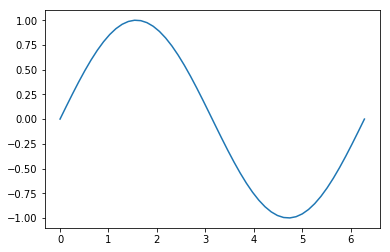

In [339]:
plt.plot(x, y1)  # graficamos la x y la y generada en datos

Con la funcion __plt.subplots__ integramos __VARIOS GRAFICOS__ en la misma figura como definir las dimensiones de la figura.

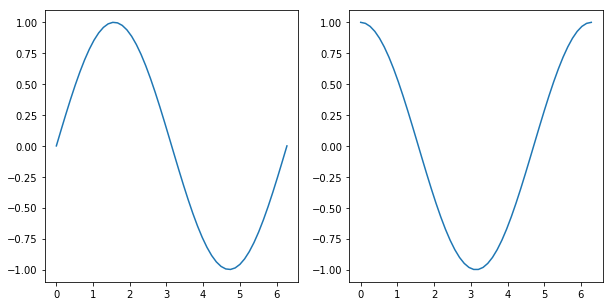

In [341]:
# Generamos datos
y1 = np.sin(x)
y2 = np.cos(x)

# Representacion gráfica de los datos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
ax1.plot(x, y1)
ax2.plot(x, y2);

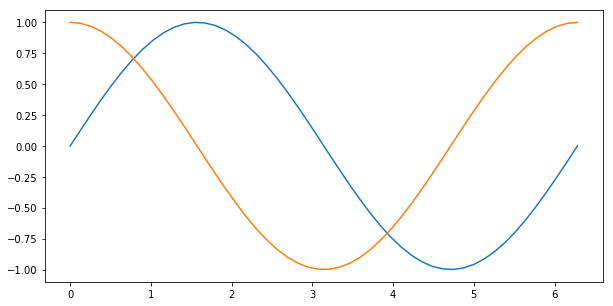

In [346]:
# Representar 2 graficos en la misma figura o grafico
    # si queremos en mismo grafico 
fig, ax = plt.subplots(nrows = 1 , figsize =(10,5))
ax.plot(x, y1)
ax.plot(x, y2);  # definimos solo un ax en vez de ax1 y ax2 para que este todo en la misma figura

### Opciones de estilo

El estilo __por defecto__ de  las graficas es muy simple, pero en Matplotlib se pueden insertar opciones que lo enriquece.

##### Pintar cuadricula

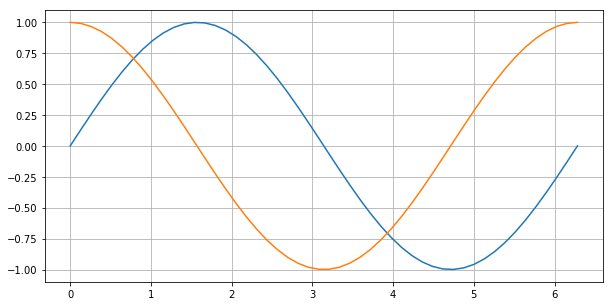

In [349]:
fig, ax = plt.subplots(1, figsize = (10, 5))

# Opcion estilo: Pintar una CUADRICULA en la grafica
ax.grid(True)  # Esto pinta CUADRICULAS

ax.plot(x, y1)
ax.plot(x, y2);  # IMPORTANTE: poner un punto y coma al final

El __METODO AXIS__ devuelve 4 valores que se corresponden con los valores __LIMITES__ de las variables x y la variable z.

##### Añadiendo etiquetas al gráfico

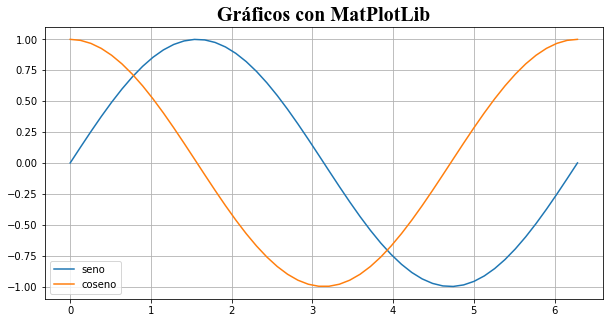

In [351]:
# Añadir un titulo y la leyenda (explica la naturaleza de los ejes)

fig, ax = plt.subplots(1, figsize = (10, 5))
ax.grid(True)  # Esto pinta CUADRICULAS en la grafica

ax.plot(x, y1, label = 'seno')   # nombre de la linea que representa al seno
ax.plot(x, y2, label = 'coseno')  # nombre de la linea que representa al coseno

ax.title.set_text("Gráficos con MatPlotLib")  # titulo del grafico
ax.title.set_fontname("Times New Roman")  # tipo de letra 
ax.title.set_fontsize(20)

ax.legend(loc = 3); # Para añadir leyendas utilizamos el metodo legend (su localizacion se puede configurar)

__LOCALIZACION DE LA LEYENDA __ 
 - 0(best possible), 
 - 1(upper right)
 - 2 (upper left)
 - 3 (lower left)
 - 4 (lower right)
 - 5 (right)
 - 6 (center left)
 - 7 (center right)
 - 8 (lower center)
 - 9 (upper center)
 - 10 (center)

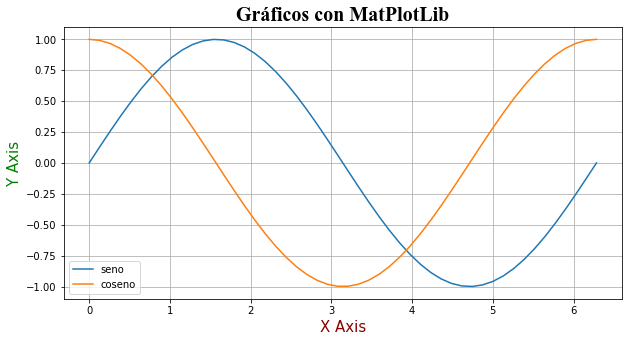

In [354]:
# Añadir el nombre a cada uno de sus ejes

fig, ax = plt.subplots(1, figsize = (10, 5))
ax.grid(True)  # Esto pinta CUADRICULAS en la grafica

ax.plot(x, y1, label = 'seno')   # nombre de la linea que representa al seno
ax.plot(x, y2, label = 'coseno')  # nombre de la linea que representa al coseno

# Escribimos informacion de la naturaleza de los ejes 
ax.axes.xaxis.set_label_text("X Axis", fontdict={'size': 15, 'color': 'darkred'})
ax.axes.yaxis.set_label_text("Y Axis", fontdict={'size' : 15, 'color': 'green'})

# Titulo Inicial del Grafico
ax.title.set_text("Gráficos con MatPlotLib")  # titulo del grafico
ax.title.set_fontname("Times New Roman")  # tipo de letra 
ax.title.set_fontsize(20)

# Leyenda (localizacion leyenda arriba)
ax.legend(loc = 3); 

##### Cambiando el estilo de la presentacion
- Por defecto, el metodo __plot__ representa DATOS mediante una linea continua de color azul, pero queremos representar los datos discretos mediante puntos, cambiar opciones de estilo

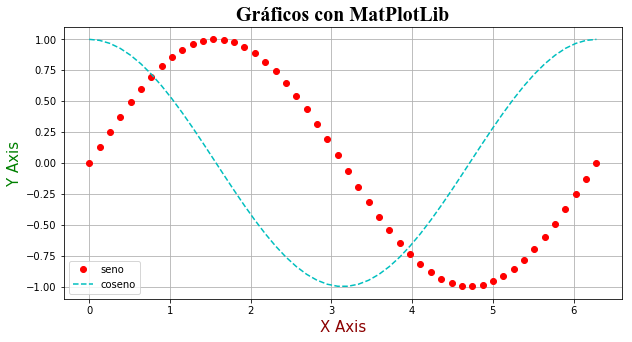

In [357]:
 # Cambiar el punteado del grafico: de linea continua a puntos y lineas separadas
    
fig, ax = plt.subplots(1, figsize = (10, 5))
ax.grid(True)  # Esto pinta CUADRICULAS en la grafica

# Pintar los datos con puntos: ('o') y rojos ('r')
ax.plot(x, y1, 'ro', label = 'seno')   # nombre de la linea que representa al seno
ax.plot(x, y2, 'c--' ,label = 'coseno')  # nombre de la linea que representa al coseno

# Escribimos informacion de la naturaleza de los ejes 
ax.axes.xaxis.set_label_text("X Axis", fontdict={'size': 15, 'color': 'darkred'})
ax.axes.yaxis.set_label_text("Y Axis", fontdict={'size' : 15, 'color': 'green'})

# Titulo Inicial del Grafico
ax.title.set_text("Gráficos con MatPlotLib")  # titulo del grafico
ax.title.set_fontname("Times New Roman")  # tipo de letra 
ax.title.set_fontsize(20)

# Leyenda (localizacion leyenda arriba)
ax.legend(loc = 3); 

__COLORES LINEAS__
b : azul, g: verde, r: rojo, c : cyan, m: magenta, y: amarillo, k : negro, w: blanco


__CARACTER O ESTILO DE LAS LINEAS__
1. -. (dash dot)
2. -- (dashed line)
3. o (circulo)
4. v : triangle down
5. > triangle right
6. < triangle left
7. 1 tri down
8. 2 tri up
9. 3 tri left
10. 4 tri right
11. 8 octagon
12. s square
13. p pentagon
14. * star
15. h :hexagon1
16. H: hexagon2
17. + plus
18. x : x
19. D: diamond
20. d: thin diamond

##### Representacion de 2 variables : 2 columnas de un NumPy Array
- Es posible pasar como parametro al metodo plot un array de 2 dimensiones 
- Uso de la funcion __standard_normal__ del submodulo random de numpy

In [360]:
# Generamos 40 numeros aleatorios distribuidos en 20 filas y 2 columnas
x = np.arange(20)
y = np.random.standard_normal((20, 2))  # 20 filas y 2 columnas = 40 numeros
m = y.cumsum(axis = 0)  # Calculo de la suma acumulada de y por COLUMNAS
m  # un array de 40 numeros aleatorios 

array([[-0.98958516,  1.25596585],
       [-1.17184061,  1.18825696],
       [-0.35475   ,  1.12665819],
       [-0.77615632,  2.5380832 ],
       [-0.58195107,  3.19190422],
       [-0.06634581,  2.97620044],
       [ 0.31205819,  4.10614017],
       [-0.5261126 ,  3.09929301],
       [-0.65945115,  2.0283189 ],
       [-2.07507607,  1.56867633],
       [-2.97555009,  1.25282509],
       [-1.2332017 ,  2.02673914],
       [-1.80225517, -0.20696469],
       [-1.30891557,  1.20908928],
       [-0.24483063,  1.95238555],
       [-1.16069239,  1.77663389],
       [-1.17072378,  0.08485356],
       [-0.91351217,  1.18646802],
       [-2.63613595,  2.48701183],
       [ 0.00773078,  1.84266894]])

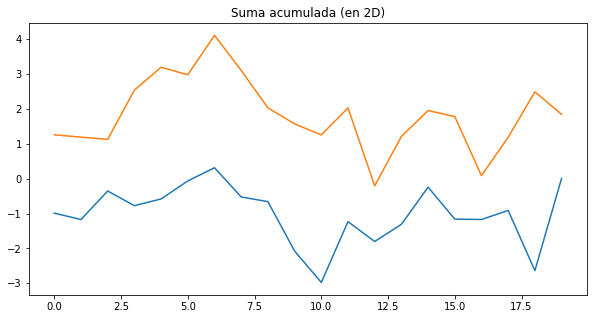

In [361]:
# Invocacion del metodo plot con el array de 2 dimensiones 

fig, ax = plt.subplots(1, figsize = (10, 5))  # dibujamos la grafica

ax.plot(m)  # graficamos el array

ax.title.set_text("Suma acumulada (en 2D)")  # Las graficas cada vez que ejecutemos arriba son dif al ser aleatorios

### Subgraficos

Cuando hay conjuntos de datos en __diferentes escalas__ entonces al representar graficamente se __pierde informacion visual__. Mostrado enel ejemplo:

In [362]:
# Vamos a MODIFICAR el ARRAY M
m[:, 0] = m[:,0] * 100  # de todas las filas y la primera columna multiplicamos por 100
m   # son dos escalas DIFERENTES DIFICILES DE GRAFICAR

array([[-9.89585164e+01,  1.25596585e+00],
       [-1.17184061e+02,  1.18825696e+00],
       [-3.54750003e+01,  1.12665819e+00],
       [-7.76156315e+01,  2.53808320e+00],
       [-5.81951075e+01,  3.19190422e+00],
       [-6.63458108e+00,  2.97620044e+00],
       [ 3.12058186e+01,  4.10614017e+00],
       [-5.26112600e+01,  3.09929301e+00],
       [-6.59451152e+01,  2.02831890e+00],
       [-2.07507607e+02,  1.56867633e+00],
       [-2.97555009e+02,  1.25282509e+00],
       [-1.23320170e+02,  2.02673914e+00],
       [-1.80225517e+02, -2.06964687e-01],
       [-1.30891557e+02,  1.20908928e+00],
       [-2.44830626e+01,  1.95238555e+00],
       [-1.16069239e+02,  1.77663389e+00],
       [-1.17072378e+02,  8.48535557e-02],
       [-9.13512172e+01,  1.18646802e+00],
       [-2.63613595e+02,  2.48701183e+00],
       [ 7.73077540e-01,  1.84266894e+00]])

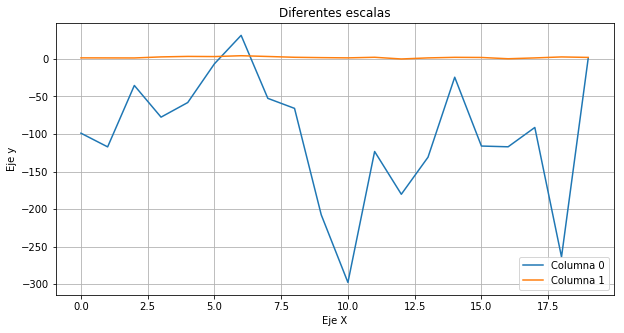

In [364]:
fig, ax = plt.subplots(1, figsize = (10, 5))  # dibujamos la grafica

ax.plot(m[:, 0], label ='Columna 0')  # graficamos el array
ax.plot(m[:, 1], label = 'Columna 1')

plt.grid(True)
ax.title.set_text("Diferentes escalas") 
plt.xlabel('Eje X')
plt.ylabel('Eje y')

ax.legend(loc = 4);

La columna 1 ha perdido __todo el significado visual__ ya quee se han representado en otra escala los de la columna 0.

> SOLUCIÓN: representar los dos conjuntos de datos __por separado__

1. Creamos una figura y 2 graficos con __plt.subplots__
2. Argumentos __nrows y ncols__ con valores 2 y 1 respectivamente
3. La funcion __plt.subplots__ devuelve una __tupla con los graficos ax1 y ax2__
4. Configuramos el 1 grafico dentro de la figura: __ax1__
5. Configuramos el 2 grafico dentro de la figura: __ax2__
- Añadimos las opciones que queramos a cada subgrafico


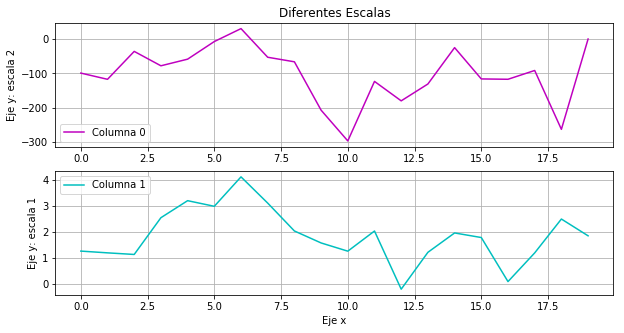

In [372]:
# Cuando hay problema de escala, representar por SEPARADO
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols= 1, figsize = (10, 5))  # 1 figura con 2 graficos

# Configurar el PRIMER GRAFICO dentro de la FIGURA
ax1.plot(m[:, 0], 'm', label ='Columna 0')  # graficamos el array color magenta
ax1.set_title('Diferentes Escalas')
ax1.grid(True)
ax1.set_ylabel('Eje y: escala 2')
ax1.legend(loc = 3)


# Configurar el SEGUNDO GRAFICO dentro de la FIGURA
ax2.plot(m[:, 1], 'c' , label ='Columna 1')  # graficamos el array color cyan
ax2.grid(True)
ax2.set_xlabel('Eje x')
ax2.set_ylabel('Eje y: escala 1')
ax2.legend(loc = 2);

# Representar los datos con distintos graficos cuando hay problemas de escala

2 subgraficos: 
1. En el segundo: __DIAGRAMA DE BARRAS__ con __bar__ en lugar de __plot__


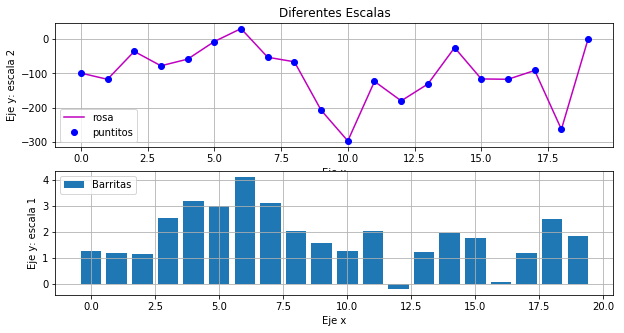

In [374]:
# Cuando hay problema de escala, representar por SEPARADO
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols= 1, figsize = (10, 5))  # 1 figura con 2 graficos

# Configurar el PRIMER GRAFICO dentro de la FIGURA
ax1.plot(m[:, 0], 'm', label ='rosa')  # graficamos el array color magenta
ax1.plot(m[:, 0], 'bo', label ='puntitos')
ax1.set_title('Diferentes Escalas')
ax1.grid(True)
ax1.set_xlabel('Eje x')
ax1.set_ylabel('Eje y: escala 2')
ax1.legend(loc = 3)


# Configurar el SEGUNDO GRAFICO dentro de la FIGURA
ax2.bar(x, m[:, 1], label ='Barritas')  # graficamos el array color cyan
ax2.grid(True)
ax2.set_xlabel('Eje x')
ax2.set_ylabel('Eje y: escala 1')
ax2.legend(loc = 2);

La llamada al metodo __BAR__ tiene como argumentos:
1. __x__ : lista de 20 enteros [0,1,...19]
2. m[;,1] : 2 columna de m (array de tamaño 20)
3. label = 'barritas' : etiqueta

La funcion __bar__ tienen MAS ARGUMENTOS opcionales que permiten, cambiar el grosor de las barrs, el color de las barras....

### Otros estilos de graficos

Con datos financieros se utilizan __graficos de puntos y de lineas__ como hemos visto pero tambien otro tipo de representaciones

##### Diagramas de dispersion(scatter):
- Utilizado para observar la __relacion entre 2 variables__

In [376]:
# Generar datos de forma aleatoria

datos = np.random.standard_normal((500, 2))  # 500 filas y 2 columnas (2 variables)
datos = datos.cumsum(axis = 0)  # suma acumulada de las filas 

datos[:10]  # mostramos las 10 primeras filas
# tambien con datos.head(10)

array([[-0.84142738,  1.128252  ],
       [-1.18319938,  0.76647638],
       [-1.90622516, -0.06165632],
       [-0.23246457,  0.13419619],
       [-1.84209422, -1.11195471],
       [-2.58658627, -2.04535988],
       [-1.85952117, -0.56202906],
       [-1.79634126,  1.49176464],
       [-1.21848609,  2.56026389],
       [-1.93571728,  1.83844964]])

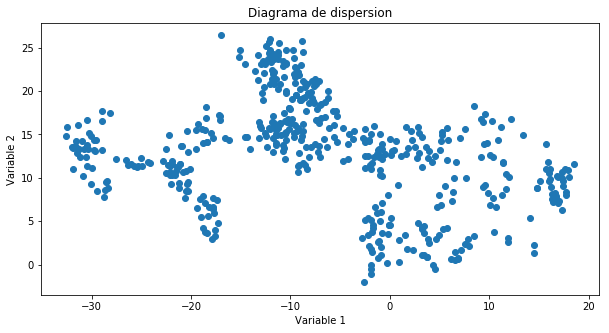

In [377]:
# Creamos un diagrama de dispersion con scatter
fig, ax1 = plt.subplots(nrows=1, figsize = (10, 5)) 
variable1=datos[:,0]  # con los datos de la primera col
variable2=datos[:,1]

ax1.scatter(variable1, variable2, marker='o')  # puntitos azules
ax1.set_title('Diagrama de dispersion')
ax1.set_xlabel('Variable 1')
ax1.set_ylabel('Variable 2');

Con el metodo __scatter__ se puede añadir una __TERCERA DIMENSION__ que sera representada mediante distintos colores.
Ej :Array de 500 nums enteros aleatorios en el intervalo [0,3)
- __funcion randint__ del modulo random de Numpy
    - La funcion __plt.colorbar: representar la barra de colores utilizada

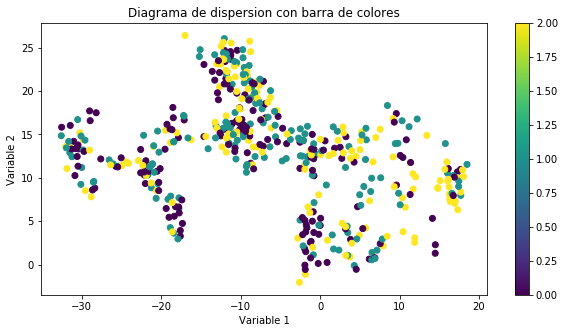

In [378]:
tercera_variable = np.random.randint(0,3, len(datos))

fig, ax1 = plt.subplots(nrows=1, figsize = (10, 5))  
sc= ax1.scatter(variable1, variable2, c = tercera_variable, marker='o')  # puntitos azules
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('Variable 1')
ax1.set_ylabel('Variable 2')
plt.colorbar(sc);

### Histogramas

Permite representar de forma grafica una __VARIABLE__ en forma de barras
- Cada barra es proporcional a la frecuencia de los datos representados

- funcion __hist__

In [379]:
# Generamos datos de forma aleatoria

datos = np.random.standard_normal((100, 2))  # 100 filas y 2 columnas
datos = abs(datos * 10)  # valor absoluto de los datos aleatorios

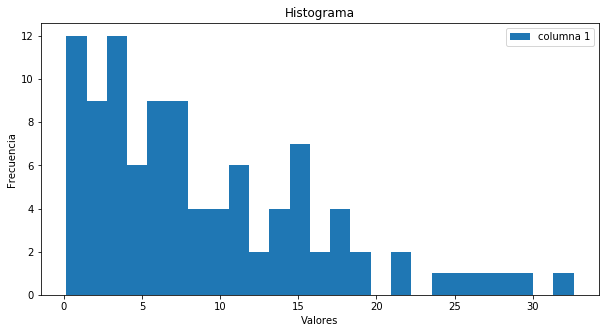

In [381]:
# Graficamos un histograma 
fig, ax1 = plt.subplots(nrows=1, figsize = (10, 5))  

# Representamos UNA SOLA VARIABLE en el histograma
ax1.hist(datos[:,1], label = ['columna 1'], bins  =25)
ax1.legend(loc = 0)  # leyenda del histograma

ax1.set_title('Histograma')  # titulo del histograma 
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frecuencia');

El metodo __hist__ soporta muchas opciones de configuracion
- El parametro __bins__ permite indicar el NUMERO DE BARRAS A REPRESENTAR : 25 barras

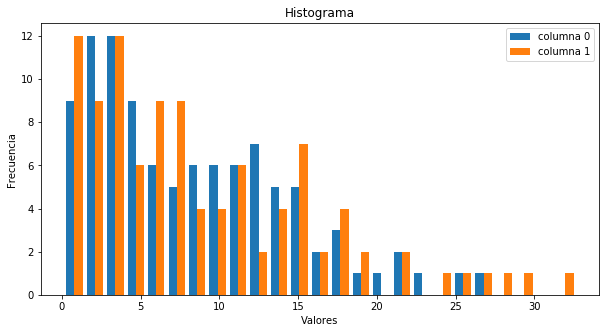

In [383]:
# Optamos por 2 VARIABLES en la misma figura cada una con un label

# Graficamos un histograma 
fig, ax1 = plt.subplots(nrows=1, figsize = (10, 5))  

# Representamos UNA SOLA VARIABLE en el histograma
ax1.hist(datos, label = ['columna 0', 'columna 1'], bins  =25)  # DIF: cojo todos los datos y pongo otro label
ax1.legend(loc = 0)  # leyenda del histograma

ax1.set_title('Histograma')  # titulo del histograma 
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frecuencia');

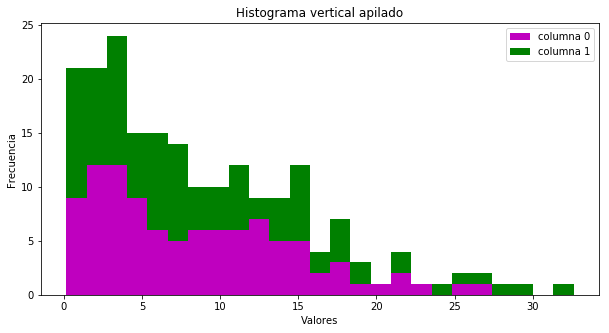

In [386]:
# HISTOGRAMA con barras apiladas en lugar de en PARALELO

# Graficamos un histograma 
fig, ax1 = plt.subplots(nrows=1, figsize = (10, 5))  

# Representamos UNA SOLA VARIABLE en el histograma
ax1.hist(datos,
         label = ['columna 0', 'columna 1'],
         color = ['m', 'g'],  # COLORES A LAS VARIABLES
         stacked = True,  # VARIABLES APILADAS
         bins  =25)
ax1.legend(loc = 0)  # leyenda del histograma

ax1.set_title('Histograma vertical apilado')  # titulo del histograma 
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frecuencia');

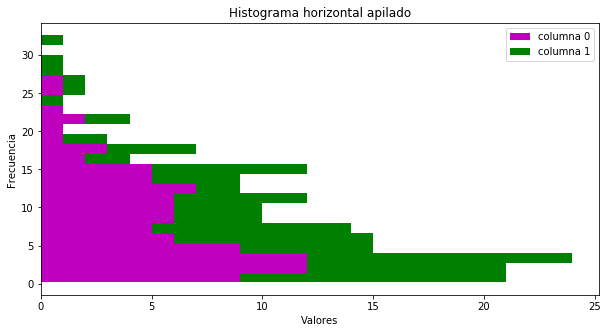

In [387]:
# MISMOS DATOS APILADOS PERO EN HORIZONTAL

# Graficamos un histograma 
fig, ax1 = plt.subplots(nrows=1, figsize = (10, 5))  

# Representamos UNA SOLA VARIABLE en el histograma
ax1.hist(datos,
         label = ['columna 0', 'columna 1'],
         color = ['m', 'g'],  # COLORES A LAS VARIABLES
         stacked = True,  # VARIABLES APILADAS
         rwidth = 1,
         bins  =25,
         orientation = 'horizontal')
ax1.legend(loc = 0)  # leyenda del histograma

ax1.set_title('Histograma horizontal apilado')  # titulo del histograma 
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frecuencia');


### Diagramas de caja o BOXPLOT

Es un gráfico (basado en __CUARTILES__ ) mediante el cual se visualiza una __VARIABLE NUMERICA__
- Permite visualizar mucha informacion (distribucion de la muestra, posicion de la mediana, el grado de asimetria, max y min...) 
- Se hace mediante el __,metodo boxplot__

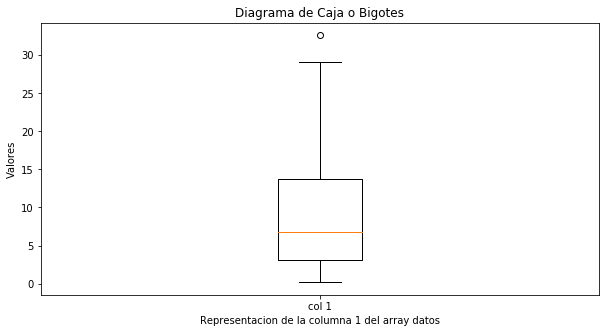

In [388]:
# BOXPLOT

fig, ax1 = plt.subplots(nrows=1, figsize = (10, 5))  

caja = ax1.boxplot(datos[:,1], labels= ['col 1'])

ax1.set_title('Diagrama de Caja o Bigotes')
ax1.set_xlabel('Representacion de la columna 1 del array datos')
ax1.set_ylabel('Valores');

In [389]:
o = caja['fliers'][0]
o.get_data()  # Esto es para ver donde estan los outliers en un boxplot

(array([1.]), array([32.61184829]))

### Guardar gráficos

Con el metodo __savefig__ guardamos los graficos en dif formatos: pdf, png, ps, etc...

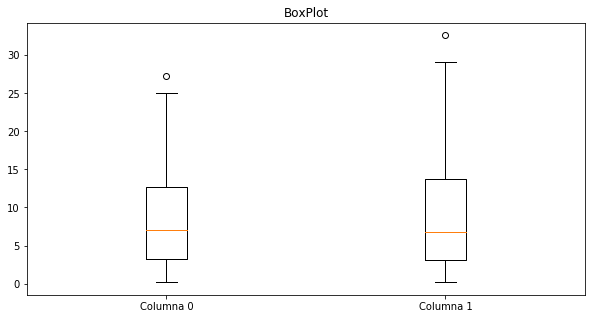

In [390]:
fig, ax = plt.subplots(nrows = 1, figsize = (10, 5))

ax.boxplot(datos)   # representamos las 2 variables (las 2 columnas)

ax.set_title('BoxPlot')
ax.set_xticklabels(['Columna 0', 'Columna 1']);

fig.savefig('mi_boxplot.pdf')
fig.savefig('mi_boxplot.png')

In [ ]:
--- FIN DE PARTE 2---

# Ejercicios